# Week 8 - Conversation and Text Generation
Many natural language activities boil down to text generation, especially the back-and-forth nature of natural conversation and question answering. While some may regard it as a parlour trick due to unpredictability, recent dramatic improvements in text generation suggest that these kind of models can find themselves being used in more serious social scientific applications, as in survey design and construction, idiomatic translation, and the normalization of phrase and sentence meanings.


Much recent NLP research is on text generation. Before the phenomenal product ChatGPT (OpenAI) was released at the end of 2022,  this is the primary use of large language models like GPT-3/4 (OpenAI), Wu Dao (Beijing Academy of AI), and Gopher (DeepMind). Then everything went wild in 2023. We saw tons of open-sourced LLMs were released like the Llama series (Meta), and how others techs wanted to compete with OpenAI by releasing models like Claude (Anthropic), Bard (Google), Gemini (Google x2), etc. The success of these models have prompted debate over whether the risks and perils of artificial general intelligence (AGI) is approaching!

In [4]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
import lucem_illud

import sklearn #For generating some matrices
import pandas as pd #For DataFrames
import numpy as np #For arrays
import matplotlib.pyplot as plt #For plotting
import seaborn #Makes the plots look nice
import seaborn as sns
import scipy #Some stats
import nltk #a little language code
from IPython.display import Image #for pics

import pickle #if you want to save layouts
import os
import io
import zipfile

import networkx as nx

%matplotlib inline

import torch # pip install torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertConfig # pip install tranformers
from transformers import AdamW, BertForSequenceClassification
from tqdm import tqdm, trange

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-x3ggw1kd
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-x3ggw1kd
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
%matplotlib inline

In [3]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.preprocessing.sequence import pad_sequences

# ConvoKit
As we alluded to in Week 7 with causal inference, [ConvoKit](https://convokit.cornell.edu/) is an exciting platform for conversational analysis developed by Jonathan Chang, Calem Chiam, and others, mostly at Cornell. Keep this in mind if you are interested in a final project with conversational data such as Twitter threads or movie scripts. They have an [interactive tutorial](https://colab.research.google.com/github/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/Introduction_to_ConvoKit.ipynb), which we include some examples from below. Most of the following text and code is authored by them.

These ConvoKit corpora can be used for the next exercise in this notebook.

In [5]:
try:
    import convokit
except ModuleNotFoundError:
    !pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.2/183.2 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.5 MB/s eta 0:00:00
  Created wheel for convokit: filename=convokit-3.0.0-py3-none-any.whl size=216707 sha256=a8b996a49075af150b443b46ce65eb7cb2b234a39068b8ed375e28d2a89020b5
  Stored in directory: /root/.cache/pip/wheels/c4/89/8c/2677fdb888588b6f93cb6ac86bdfb020f1f1

In [6]:
# for pretty printing of cells within the Colab version of this notebook
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [7]:
import convokit
from convokit import Corpus, download

### Loading a Corpus

A Corpus represents a conversational dataset. We typically begin our analysis by loading a Corpus. A list of existing datasets already in ConvoKit format can be found [here](https://convokit.cornell.edu/documentation/datasets.html).

A growing list of many other conversational datasets covering a variety of conversational settings are available in ConvoKit, such as face-to-face (e.g. the [*Intelligence Squared Debates corpus*](https://convokit.cornell.edu/documentation/iq2.html)), institutional (e.g. the [*Supreme Court Oral Arguments corpus*](https://convokit.cornell.edu/documentation/supreme.html)), fictional (e.g. the [*Cornell Movie Dialog Corpus*](https://convokit.cornell.edu/documentation/movie.html)), or online  (e.g. all talkpage conversations on [*Wikipedia Talk Pages*](https://convokit.cornell.edu/documentation/wiki.html) and a full dump of [*Reddit*](https://convokit.cornell.edu/documentation/subreddit.html)).

For this tutorial, we will primarily be using the *r/Cornell* subreddit corpus to demo various ConvoKit functionality, and occasionally the [*Switchboard Dialog Act Corpus*](https://convokit.cornell.edu/documentation/switchboard.html) (a collection of anonymized five-minute telephone conversations) as a contrasting dataset.

In [ ]:
corpus = Corpus(download('subreddit-Cornell'))

# You can try a different corpus if you want.
#corpus = Corpus(download('diplomacy-corpus'))
#corpus = Corpus(download('switchboard-corpus'))
#corpus = Corpus(download('reddit-corpus-small'))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [ ]:
corpus.print_summary_stats()

Number of Speakers: 7568
Number of Utterances: 74467
Number of Conversations: 10744


### Corpus components: Conversations, Utterances, Speakers

Every Corpus has three main components: [Conversations](https://convokit.cornell.edu/documentation/conversation.html), [Utterances](https://convokit.cornell.edu/documentation/utterance.html), and [Speakers](https://convokit.cornell.edu/documentation/speaker.html). Just as in real life, in ConvoKit, Conversations are some sequence of Utterances, where each Utterance is made by some Speaker. Let's look at an example of each.

In [ ]:
# This is a Reddit thread
corpus.random_conversation().meta

ConvoKitMeta({'title': 'Cornell Refuses Gift from Renowned Architect Alumnus After 5 Women Say He Sexually Harassed Them', 'num_comments': 8, 'domain': 'cornellsun.com', 'timestamp': 1521000158, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': ''})

In [ ]:
# This is a Reddit post or comment.
corpus.random_utterance().meta

ConvoKitMeta({'score': 1, 'top_level_comment': 'di08apt', 'retrieved_on': 1496811338, 'gilded': 0, 'gildings': None, 'subreddit': 'Cornell', 'stickied': False, 'permalink': '', 'author_flair_text': '2020'})

In [ ]:
# The r/Cornell Corpus does not have speaker metadata.
#corpus.random_speaker().meta

#Speaker do have an 'id' which is their Reddit username, as seen here.
corpus.random_speaker()

Speaker({'obj_type': 'speaker', 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7b18f4e8a3e0>, 'id': 'Important_Lettuce', 'meta': ConvoKitMeta({})})

In [ ]:
# We can iterate through these objects as we iterate lists or DataFrames in Python.
for utt in corpus.iter_utterances():
    print(utt.text)
    break

I was just reading about the Princeton Mic-Check and it's getting [national press](http://www.bloomberg.com/news/2011-12-29/princeton-brews-trouble-for-us-1-percenters-commentary-by-michael-lewis.html).

I want to get a sense of what people felt like around campus. Anything interesting happen? Anything interesting coming up?


Conversations, Utterances, and Speakers are each interesting, but the magic of conversational analysis is connecting them. For example, we can get all the Conversations in which a Speaker has participated and all the Utterances they have made. To make it more interesting, we can find a Speaker to study by navigating from a random Utterance.

In [ ]:
# consider this sequence of operations that highlight how to navigate between components
utt = corpus.random_utterance()
convo = utt.get_conversation() # get the Conversation the Utterance belongs to
spkr = utt.speaker # get the Speaker who made the Utterance

spkr_convos = list(spkr.iter_conversations())

# Display up to 3 of their conversations.
spkr_convos[:3]

[Conversation({'obj_type': 'conversation', 'vectors': [], 'tree': None, 'owner': <convokit.model.corpus.Corpus object at 0x7b18f4e8a3e0>, 'id': 'e27y8', 'meta': ConvoKitMeta({'title': '"For small creatures such as we the vastness is bearable only through love." Happy Carl Sagan Day!', 'num_comments': 1, 'domain': 'youtube.com', 'timestamp': 1289070151, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': ''})}),
 Conversation({'obj_type': 'conversation', 'vectors': [], 'tree': None, 'owner': <convokit.model.corpus.Corpus object at 0x7b18f4e8a3e0>, 'id': 'e3v2z', 'meta': ConvoKitMeta({'title': 'Cornell University Lab Releases Powerful New Evidence that the Human Mind can Perceive the Future', 'num_comments': 1, 'domain': 'hplusmagazine.com', 'timestamp': 1289364274, 'subreddit': 'Cornell', 'gilded': 0, 'gildings': None, 'stickied': False, 'author_flair_text': ''})}),
 Conversation({'obj_type': 'conversation', 'vectors': [], 'tree': None, 'owner'

For a more qualitative feel of the data, you can display a Conversation. For Reddit data, this is a single thread.

In [ ]:
# We truncate sentences at character 80 to avoid making this notebook too long!
convo.print_conversation_structure(lambda utt: utt.text[:80] + "\n")



    Holy crap.  I only glanced at the abstract of the paper, but it says p-value = 1



There is a lot more to ConvoKit that we encourage you to explore, especially their [tutorial](https://colab.research.google.com/github/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/Introduction_to_ConvoKit.ipynb), but the ability to seamlessly navigate between the Utterances, Conversations, and Speakers of a Corpus is extremely valuable for social science.

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that use ConvoKit to analyze a Corpus other than 'subreddit-Cornell', including at least one function you find in the package not used above. You can also generate a ConvoKit Corpus from your own dataset based on [their Corpus from .txt files tutorial](https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/converting_movie_corpus.ipynb) or [their Corpus from pandas tutorial](https://github.com/CornellNLP/Cornell-Conversational-Analysis-Toolkit/blob/master/examples/corpus_from_pandas.ipynb), but that may be time-consuming for a weekly assignment. (It could be a great idea for your final project!)

In [9]:
#corpus = Corpus(download('subreddit-hey'))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [10]:
#corpus.print_summary_stats()

Number of Speakers: 15
Number of Utterances: 23
Number of Conversations: 16


In [11]:
corpus = Corpus(download('switchboard-corpus'))

In [12]:
corpus.print_summary_stats() ## lots of utterance in a small sets of conversations

Number of Speakers: 440
Number of Utterances: 122646
Number of Conversations: 1155


In [13]:
# I expect the conversations to be long; so here's a random utterance example
corpus.random_utterance().meta

ConvoKitMeta({'tag': [['{D Well, } {E I mean, } I think that there are many cases in our judicial system where justice is not served. /', 'sv']]})

In [14]:
corpus.random_utterance().meta

ConvoKitMeta({'tag': [['They, {F uh, } auctioned some tools and,', 'sd']]})

In [15]:
corpus.random_speaker()

Speaker({'obj_type': 'speaker', 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x7ab4fd18a890>, 'id': '1501', 'meta': ConvoKitMeta({'sex': 'FEMALE', 'education': 1, 'birth_year': 1962, 'dialect_area': 'WESTERN'})})

In [16]:
utt = corpus.random_utterance()
convo = utt.get_conversation() # get the Conversation the Utterance belongs to
spkr = utt.speaker # get the Speaker who made the Utterance

spkr_convos = list(spkr.iter_conversations())

# Display up to 3 of their conversations.
spkr_convos[:3]

[Conversation({'obj_type': 'conversation', 'vectors': [], 'tree': None, 'owner': <convokit.model.corpus.Corpus object at 0x7ab4fd18a890>, 'id': '2499-0', 'meta': ConvoKitMeta({'filename': './swda/sw05utt/sw_0534_2499.utt.csv', 'talk_day': '1991-4-8', 'topic_description': 'MOVIES', 'length': 6, 'prompt': 'FIND OUT WHAT THE OTHER CALLER THOUGHT ABOUT THE LAST FEW MOVIES THEY SAW. WHAT MOVIES HAVE YOU SEEN LATELY?', 'from_caller': '1141', 'to_caller': '1064'})}),
 Conversation({'obj_type': 'conversation', 'vectors': [], 'tree': None, 'owner': <convokit.model.corpus.Corpus object at 0x7ab4fd18a890>, 'id': '2782-0', 'meta': ConvoKitMeta({'filename': './swda/sw05utt/sw_0542_2782.utt.csv', 'talk_day': '1991-5-3', 'topic_description': 'FAMILY FINANCE', 'length': 10, 'prompt': 'DOES YOUR FAMILY KEEP A MONTHLY BUDGETCAN YOU GIVE A GENERAL DESCRIPTION OF YOUR PROCEDURES', 'from_caller': '1244', 'to_caller': '1064'})}),
 Conversation({'obj_type': 'conversation', 'vectors': [], 'tree': None, 'owner

In [17]:
convo.print_conversation_structure(lambda utt: utt.text[:80] + "\n") # cannot see fully,

<Talking> Okay.  /{D So, } {F uh, } then, do you keep kids?  /Is this two year o

    # <Noise> <<dryer>> <child_talking> <TV> No.  /I have two children.  /# I have a

        {F Oh, } that's exactly what I have. /

            Really? /

                Yes. /

                    That's wild. /

                        I know. /

                            <Laughter>.

                                I, - /[ my, + my ] little girl was three and a half in March  /{C and } my son w

                                    {F Oh, } boy.  /{D Well, } mine was two in March  /{C and } the three and a half

                                        That's pretty close. /

                                            {C So } that is pretty close # <laughter>. # /

                                                # Yeah. # /

                                                    {C But } I'm home with the kids all day  /{C and } I have really, {F uh, } tried

                                          

We can see this is probably not some written text; Likely come from a movie transcript or informal sources, with description of the noise/background/interactions. (Some sentenses are incomplete and someone is speaking with dialect or meme I don't really get haha)


In [18]:
# dive into the speaker: seems we have the gender/education/dialect information here

spkr.meta

ConvoKitMeta({'sex': 'FEMALE', 'education': 9, 'birth_year': 1951, 'dialect_area': 'NORTHERN'})

Also, lets make this into a dataframe

In [19]:
# Let's see what other conversation this speak is in

spkr_conversations = spkr.get_conversations_dataframe()

spkr_conversations # This would show various topics this particular person engaged in

# helpful for character centric research

# idea for final project -- create such a corpus for the fictional characters
# - statistics about what conversation they engaged in, topic, character around characters



,vectors,meta.filename,meta.talk_day,meta.topic_description,meta.length,meta.prompt,meta.from_caller,meta.to_caller
id,,,,,,,,
2499-0,[],./swda/sw05utt/sw_0534_2499.utt.csv,1991-4-8,MOVIES,6,FIND OUT WHAT THE OTHER CALLER THOUGHT ABOUT T...,1141,1064
2782-0,[],./swda/sw05utt/sw_0542_2782.utt.csv,1991-5-3,FAMILY FINANCE,10,DOES YOUR FAMILY KEEP A MONTHLY BUDGETCAN YOU ...,1244,1064
2065-0,[],./swda/sw06utt/sw_0635_2065.utt.csv,1991-3-8,UNIVERSAL PBLIC SERV,10,SEE HOW THE OTHER CALLER FEELS ABOUT THE PROPO...,1140,1064
2847-0,[],./swda/sw06utt/sw_0654_2847.utt.csv,1991-5-10,BOOKS AND LITERATURE,8,FIND OUT WHAT BOOKS THE OTHER CALLER READS FOR...,1132,1064
2900-0,[],./swda/sw06utt/sw_0657_2900.utt.csv,1991-5-17,UNIVERSAL HEALTH INS,8,DO YOU BELIEVE THAT THE US GOVERNMENT SHOULD P...,1257,1064
2025-0,[],./swda/sw07utt/sw_0735_2025.utt.csv,1991-3-6,TRIAL BY JURY,6,DISCUSS POSSIBLE CHANGES IN THE WAY TRIALS BY ...,1061,1064
2376-0,[],./swda/sw07utt/sw_0744_2376.utt.csv,1991-4-2,RECYCLING,5,WHAT IS BEING DONE IN YOUR COMMUNITY OR AREA A...,1133,1064
2325-0,[],./swda/sw08utt/sw_0899_2325.utt.csv,1991-3-28,CHILD CARE,6,FIND OUT WHAT CRITERIA THE OTHER CALLER WOULD ...,1005,1064
2355-0,[],./swda/sw10utt/sw_1015_2355.utt.csv,1991-4-1,SOCIAL CHANGE,10,DISCUSS RECENT SOCIAL CHANGES. HOW IS LIFE IN...,1074,1064


In [21]:
# prepare a character list from the corpus

characters_df = corpus.get_speakers_dataframe() # nice and neat method!

characters_df

,vectors,meta.sex,meta.education,meta.birth_year,meta.dialect_area
id,,,,,
1519,[],FEMALE,1,1971,SOUTH MIDLAND
1632,[],FEMALE,2,1962,WESTERN
1597,[],MALE,3,1962,WESTERN
1635,[],FEMALE,2,1965,NORTHERN
1564,[],MALE,3,1952,NORTHERN
...,...,...,...,...,...
1671,[],FEMALE,2,1970,NORTH MIDLAND
1654,[],MALE,3,1959,WESTERN
1680,[],FEMALE,3,1950,NYC


In [25]:
convo_df = corpus.get_conversations_dataframe()
convo_df

,vectors,meta.filename,meta.talk_day,meta.topic_description,meta.length,meta.prompt,meta.from_caller,meta.to_caller
id,,,,,,,,
4325-0,[],./swda/sw00utt/sw_0001_4325.utt.csv,1992-3-23,CHILD CARE,5,FIND OUT WHAT CRITERIA THE OTHER CALLER WOULD ...,1632,1519
4330-0,[],./swda/sw00utt/sw_0002_4330.utt.csv,1992-3-23,DRUG TESTING,5,HOW DO YOU FEEL ABOUT THE PRACTICE OF SOME COM...,1635,1597
4103-0,[],./swda/sw00utt/sw_0003_4103.utt.csv,1992-3-9,FAMILY FINANCE,5,DOES YOUR FAMILY KEEP A MONTHLY BUDGETCAN YOU ...,1606,1564
4327-0,[],./swda/sw00utt/sw_0004_4327.utt.csv,1992-3-23,TRIAL BY JURY,5,DISCUSS POSSIBLE CHANGES IN THE WAY TRIALS BY ...,1619,1639
4646-0,[],./swda/sw00utt/sw_0005_4646.utt.csv,1992-4-10,CARE OF THE ELDERLY,5,PLEASE DISCUSS CARE OF THE ELDERLY. FIND OUT ...,1197,1670
...,...,...,...,...,...,...,...,...
4179-0,[],./swda/sw13utt/sw_1324_4179.utt.csv,1992-3-13,PETS,5,FIND OUT WHAT KIND OF PETS THE OTHER CALLER HAS,1574,1583
4384-0,[],./swda/sw13utt/sw_1325_4384.utt.csv,1992-3-25,CHILD CARE,5,FIND OUT WHAT CRITERIA THE OTHER CALLER WOULD ...,1653,1646
4622-0,[],./swda/sw13utt/sw_1326_4622.utt.csv,1992-4-9,CLOTHING AND DRESS,5,THE TOPIC IS CLOTHING. PLEASE FIND OUT HOW TH...,1671,1528


Now we can understand that the Capital letter thing appeared above is the PROMPT of this discussion.

## Creating networks of agents from corpora

Now let's return to the Davies corpora (specifically, Soap Operas) to see how we can extract actors and build a network of their relationships in the texts.

We'll use the `lucem_illud.loadDavies()` function to get the dataframe. Make sure to download `SOAP.zip` from DropBox, unzip, and edit the following line with the path to that file. This code may take some time.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
corpora_address = "/content/drive/MyDrive/Colab Notebooks/Computational Content Analysis/Homework-Notebooks-2024-Winter/data/SOAP"

In [ ]:
soap_texts = lucem_illud.loadDavies(corpora_address, num_files=2000)

We now use the source to see how the data is stored. Note that this is different from the movies corpus, and that we will need to use a different aggregating method to store the data. Each dataset would have a different approach, but they are all very similar, it depends on how the data is stored. Here multiple textids match multiple scripts, so our soap dataframe would be structured a little differently.

You can see the first 20 lines of the source file here.

In [ ]:
zfile = zipfile.ZipFile(corpora_address + "/soap_sources.zip")
source = []

In [ ]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [ ]:
source[0:20]

In [ ]:
soap_dict = {}

In [ ]:
for soap in source[3:]:
    try:
        textID, year, show, url = soap.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    if show.strip() not in soap_dict:
        soap_dict[show.strip()] = []
    if show.strip() in soap_dict:
        try:
            soap_dict[show.strip()].append(soap_texts[textID.strip()])
        except KeyError:
            continue

In [ ]:
soap_dict.keys()

In [ ]:
soap_df = pd.DataFrame(columns=["Soap Name", "Tokenized Texts"])

In [ ]:
i = 0

In [ ]:
for soap in soap_dict:
    # since there were multiple lists
    print(soap)
    full_script = []
    for part in soap_dict[soap]:
        full_script = full_script + part
    soap_df.loc[i] = [soap, full_script]
    i += 1

In [ ]:
soap_df

We now have each Soap, and each of the Tokenized texts. Let us see what kind of information we can get. These are American soap operas, and are likely to be cheesy and dramatic (an understatment). A fun start would be to make networks of each of the actors and actresses in these soaps.

What would be a good way to create a network? Maybe everytime someone talks to someone we add one weight? But we wouldn't want to add weights whenever it's a different scene - or maybe we do? Let us look at the text and figure it out.

Note that we didn't add the year here because it spans over multiple years. If we are doing different kinds of analysis we would want to a years column as well.

In my dataframe, Days of Our Lives is the 4th corpora, and I conducted my basic analysis on that.

In [ ]:
dool = soap_df['Tokenized Texts'][3]

In [ ]:
' '.join(dool[0:1500])

Hmmm... we can't do our normal text processing. But this provides us with an interesting oppurtunity: every '@!' is followed by some useeful information. Let us do a quick check of how many characters exist here, and how many times they speak.

In [ ]:
characters = {}

In [ ]:
for token in dool:
    if token[0] == '@':
        # all characters or actions start with @, so we add that to character
        if token[2:] not in characters:
            characters[token[2:]] = 0
        if token[2:] in characters:
            characters[token[2:]] += 1


In [ ]:
len(characters)

Wow, that's a lot of characters: but we notice a '@!' between certain actions too, such as screaming and sobbing. Let us maybe only look for characters with a high number of appearances?

In [ ]:
for character in characters:
    if characters[character] > 2000:
        print(character, characters[character])

Let's check these folks out on the interwebz...a image of search of the name + "days of our lives":

In [ ]:
Image(filename='../data/dool/dool_john.png')

In [ ]:
Image(filename='../data/dool/dool_brady.jpg')

In [ ]:
# Image(filename='../data/dool/dool_hope.jpeg')

In [ ]:
# Image(filename='../data/dool/dool_philip.jpeg')

In [ ]:
# Image(filename='../data/dool/dool_marlena.jpg')

In [ ]:
# Image(filename='../data/dool/dool_kate.png')

In [ ]:
# Image(filename='../data/dool/dool_bo.png')

In [ ]:
# Image(filename='../data/dool/dool_chloe.jpg')

In [ ]:
# Image(filename='../data/dool/dool_sami.jpg')

In [ ]:
# Image(filename='../data/dool/dool_shawn.jpg')

In [ ]:
# Image(filename='../data/dool/dool_belle.jpg')

In [ ]:
# Image(filename='../data/dool/dool_lucas.jpg')

In [ ]:
# Image(filename='../data/dool/dool_nicole.jpg')

These are definitely big, long-time players in the dramatic Days narrative. It would make sense to create a graph where each character who appears over 2000 times is a node, and each time they talk to each other, we add one to their weight. We should also store all the things these chracters say: that's useful information.

So we now iterate through the tokens in a manner where we can capture this information.

In [ ]:
actor_network = nx.Graph()

In [ ]:
for character in characters:
    if characters[character] > 2000:
        actor_network.add_node(character, lines_spoken= characters[character], words=[])

In [ ]:
len(actor_network.nodes.data())

In [ ]:
actor_network.nodes.data()

In [ ]:
actor_network.nodes['Sami']['lines_spoken']

In [ ]:
i = 0

The following lines of code creates the graph of actors and their relationships.

In [ ]:
for token in dool:
    i += 1
    if i > len(dool):
        break
    if token[0] == "@":
        if token[2:] in actor_network.nodes():
            j = i
            for token_ in dool[i:]:
                if token_[0] == "@":
                    # if both the characters exist in the graph, add a weight
                    if token_[2:] != token[2:] and token_[2:] in actor_network.nodes():
                        if (token[2:], token_[2:]) not in actor_network.edges():
                            actor_network.add_edge(token[2:], token_[2:], weight=0)
                        if (token[2:], token_[2:]) in actor_network.edges():
                            actor_network.edges[(token[2:], token_[2:])]['weight'] += 1
                    break
                j += 1
            # adding characters sentences
            actor_network.nodes[token[2:]]['words'].append(dool[i:j])

In [ ]:
nx.draw(actor_network, with_labels=True, font_weight='bold')

In [ ]:
L = []
for node in actor_network.nodes():
    l = []
    for node_ in actor_network.nodes():
        if node == node_:
            l.append(0)
        else:
            l.append(actor_network.edges[(node, node_)]['weight'])
    L.append(l)
M_ = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M_, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(actor_network))

In [ ]:
c

### Finding structure in networks

We now have a lot of useful information: we have a graph of all the characters, with their relationships with other characters, as well as all the words they've said. We tried finding communities, but it seems like everyone is connected to everyone: each of them form their own 'community'. Seems like people talk to each other a bunch in soaps.

This is however, not the best network to find any meaningful patterns, as we can see with everyone connected to everyone. But as we can see with our heatmap, not everyone talks to everyone an equal amount. How about we only keep our "important" ties, where people are talking to each other a lot?

In [ ]:
smaller_actor_network = nx.Graph()

In [ ]:
for actor_1 in actor_network.nodes():
    smaller_actor_network.add_node(actor_1, lines_spoken= actor_network.nodes[actor_1]['lines_spoken'], words=actor_network.nodes[actor_1]['words'])
    for actor_2 in actor_network.nodes():
        if actor_2!=actor_1 and actor_network.edges[(actor_1, actor_2)]['weight'] > 250:
            smaller_actor_network.add_edge(actor_1, actor_2, weight=actor_network.edges[(actor_1, actor_2)]['weight'])


In [ ]:
nx.draw(smaller_actor_network, with_labels=True, font_weight='bold')

This is a lot more interesting: while the sets of characters overlap, there is still two distinct communities if you look at characters who regularly talk to each other!

Let us see what our centrality measures look like, as well as communities.

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(smaller_actor_network))

In [ ]:
c

In [ ]:
dcentralities = nx.degree_centrality(smaller_actor_network)

In [ ]:
dcentralities['John'], dcentralities['Philip']

Our two different communities show up as detected by the networkx algorithm, and when we look at centralities, we can see that John is a lot more central than Philip.

Let us go back to our original graph, and see if the weight or number of similar appearences matches the text... how do we do this? Well, we already have the graph, and we also have information of who spoke to who. So we have our framework!

This means we can explore ideas contained in two of the papers you will be reading: . “No country for old members: User lifecycle and linguistic change in online communities.”, and  “Fitting In or Standing Out? The Tradeoffs of Structural and Cultural Embeddedness”, both of which you can access on Canvas.

Let us use a simplified version of the papers, and check if a higher number of conversations might lead to a higher similarity between the word distributions for two characters. We can use the same divergences we used in the last notebook. Do you think it will match with the number of times each character was associated with each other?

In [ ]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [ ]:
corpora = []
for character in actor_network.nodes():
    character_words = []
    for sentence in actor_network.nodes[character]['words']:
        for word in sentence:
            character_words.append(word)
    corpora.append(lucem_illud.normalizeTokens(character_words))

In [ ]:
L = []

In [ ]:
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)

In [ ]:
fig = plt.figure()
div = pd.DataFrame(M, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

In [ ]:
# np.corrcoef(M_, M)[0]

With our two heatplots, we can attempt to do some rudimentary analysis. We can see from our previous plot that Shawn and Belle talk to each other a lot, so do Hope and Bo, and Nicole and Brady, and Lucas and Sami. Do they also talk *like* each other?

Kind of, actually: all four of these pairs have a lower distance between them. Now I don't know anything about this particular soap... are these four pairs related? Are they in a relationship, either married or dating, or are they just really good friends?

This lays out the frameworks which you can now use to explore your own networks.

# Interactional influence

Before we utilize transformers, let's see how to estimate the influence of one speaker on another in order to estimate a kind of interpersonal influence network based on a recent paper by Fangjian Guo, Charles Blundell, Hanna Wallach, and Katherine Heller entitled ["The Bayesian Echo Chamber: Modeling Social Influence via Linguistic Accommodation"](https://arxiv.org/pdf/1411.2674.pdf). This relies on a kind of point process called a Hawkes process that estimate the influence of one point on another. Specifically, what they estimate is the degree to which one actor to an interpersonal interaction engaged in "accomodation" behaviors relative to the other, generating a directed edge from the one to the other.

### First let's look at the output of their analysis:

In [ ]:
example_name = '12-angry-men'   #example datasets: "12-angry-men" or "USpresident"

In [ ]:
result_path = '../data/Bayesian-echo/results/{}/'.format(example_name)
if not os.path.isdir(result_path):
    raise ValueError('Invalid example selected, only "12-angry-men" or "USpresident" are avaliable')

In [ ]:
df_meta_info = pd.read_table(result_path + 'meta-info.txt',header=None)
df_log_prob = pd.read_csv(result_path + "SAMPLE-log_prior_and_log_likelihood.txt",delim_whitespace=True) #log_prob samples
df_influence = pd.read_csv(result_path + 'SAMPLE-influence.txt',delim_whitespace=True) # influence samples
df_participants = pd.read_csv(result_path + 'cast.txt', delim_whitespace=True)
person_id = pd.Series(df_participants['agent.num'].values-1,index=df_participants['agent.name']).to_dict()
print()
print ('Person : ID')
person_id

In [ ]:
def getDensity(df):
    data = df#_log_prob['log.prior']
    density = scipy.stats.gaussian_kde(data)
    width = np.max(data) - np.min(data)
    xs = np.linspace(np.min(data)-width/5, np.max(data)+width/5,600)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    return xs, density(xs)

### Plot MCMC (Markov Monte Carlo) trace and the density of log-likelihoods

In [ ]:
fig = plt.figure(figsize=[12,10])

plt.subplot(4,2,1)
plt.plot(df_log_prob['log.prior'])
plt.xlabel('Iterations')
plt.title('Trace of log.prior')

plt.subplot(4,2,2)
x,y = getDensity(df_log_prob['log.prior'])
plt.plot(x,y)
plt.xlabel('Iterations')
plt.title('Density of log.prior')

plt.subplot(4,2,3)
plt.plot(df_log_prob['log.likelihood'])
plt.title('Trace of log.likelihood')
plt.xlabel('Iterations')
plt.tight_layout()

plt.subplot(4,2,4)
x,y = getDensity(df_log_prob['log.likelihood'])
plt.plot(x,y)
plt.xlabel('Iterations')
plt.title('Density of log.likelihood')

plt.subplot(4,2,5)
plt.plot(df_log_prob['log.likelihood.test.set'])
plt.title('Trace of log.likelihood.test.set')
plt.xlabel('Iterations')
plt.tight_layout()

plt.subplot(4,2,6)
x,y = getDensity(df_log_prob['log.likelihood.test.set'])
plt.plot(x,y)
plt.xlabel('Iterations')
plt.title('Density of log.likelihood.test.set')

plt.subplot(4,2,7)
plt.plot(df_log_prob['log.prior']+df_log_prob['log.likelihood'])
plt.title('Trace of log.prob')
plt.xlabel('Iterations')

plt.subplot(4,2,8)
x,y = getDensity(df_log_prob['log.prior']+df_log_prob['log.likelihood'])
plt.plot(x,y)
plt.xlabel('Iterations')
plt.title('Density of log.prob')

plt.tight_layout()

plt.show()

### Plot the influence matrix between participants

In [ ]:
A = int(np.sqrt(len(df_influence.columns))) #number of participants
id_person = {}
for p in person_id:
    id_person[person_id[p]]=p

In [ ]:
def getmatrix(stacked,A):
    influence_matrix = [[0 for i in range(A)] for j in range(A)]
    for row in stacked.iteritems():
        from_ = int(row[0].split('.')[1])-1
        to_ = int(row[0].split('.')[2])-1
        value = float(row[1])
        influence_matrix[from_][to_]=value
    df_ = pd.DataFrame(influence_matrix)

    df_ =df_.rename(index = id_person)
    df_ =df_.rename(columns = id_person)
    return df_

In [ ]:
stacked = df_influence.mean(axis=0)
df_mean = getmatrix(stacked,A)

stacked = df_influence.std(axis=0)
df_std = getmatrix(stacked,A)

In [ ]:
df_mean

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
seaborn.heatmap(df_mean, annot=True,  linewidths=.5, ax=ax,cmap="YlGnBu")
print('MEAN of influence matrix (row=from, col=to)')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
seaborn.heatmap(df_std, annot=True,  linewidths=.5, ax=ax,cmap="YlGnBu")
print('SD of influence matrix (row=from, col=to)')
plt.show()

### Barplot of total influences sent/received

In [ ]:
sender_std = {} #sd of total influence sent
reciever_std = {} #sd of total influence recieved
for i in range(A):
    reciever_std[id_person[i]] = df_influence[df_influence.columns[i::A]].sum(axis=1).std()
    sender_std[id_person[i]] = df_influence[df_influence.columns[i*A:(i+1)*A:]].sum(axis=1).std()

sent = df_mean.sum(axis=1) #mean of total influence sent
recieved =df_mean.sum(axis=0) #mean of total influence recieved

Total influence:

In [ ]:
print ("\t\tTotal linguistic influence sent/received ")
ax.fig = plt.figure(figsize=[np.min([A,20]),6])

plt.grid()
wd=0.45
ii=0
for p in sender_std:
    plt.bar(person_id[p],sent.loc[p],width=wd,color='red',alpha=0.6,label = "Sent" if ii == 0 else "")
    plt.plot([person_id[p]-wd/4,person_id[p]+wd/4],[sent.loc[p]+sender_std[p],sent.loc[p]+sender_std[p]],color='k')
    plt.plot([person_id[p]-wd/4,person_id[p]+wd/4],[sent.loc[p]-sender_std[p],sent.loc[p]-sender_std[p]],color='k')
    plt.plot([person_id[p],person_id[p]],[sent.loc[p]-sender_std[p],sent.loc[p]+sender_std[p]],color='k')
    ii+=1
ii=0
for p in reciever_std:
    plt.bar(person_id[p]+wd,recieved.loc[p],width=wd,color='blue',alpha=0.4,label = "Received" if ii == 0 else "")
    plt.plot([person_id[p]+wd-wd/4,person_id[p]+wd+wd/4],[recieved.loc[p]+reciever_std[p],recieved.loc[p]+reciever_std[p]],color='k')
    plt.plot([person_id[p]+wd-wd/4,person_id[p]+wd+wd/4],[recieved.loc[p]-reciever_std[p],recieved.loc[p]-reciever_std[p]],color='k')
    plt.plot([person_id[p]+wd,person_id[p]+wd],[recieved.loc[p]-reciever_std[p],recieved.loc[p]+reciever_std[p]],color='k')
    ii+=1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.xticks([i+0.25 for i in range(A)],list(zip(*sorted(id_person.items())))[1])
plt.ylabel('value')
plt.xlabel('speaker',fontsize=14)
plt.show()

## Visualize Influence Network!

You can visualize any of the influence matrices above:

Using networkx:

In [48]:
def drawNetwork(df,title):
    fig = plt.figure(figsize=[8,8])
    G = nx.DiGraph()
    for from_ in df.index:
        for to_ in df.columns:
            G.add_edge(from_,to_,weight = df.loc[from_][to_])

    pos = nx.spring_layout(G,k=0.55,iterations=20)
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    weights = np.array(weights)
    #weights = weights*weights
    weights = 6*weights/np.max(weights)
    print(title)

    edge_colors=20*(weights/np.max(weights))
    edge_colors = edge_colors.astype(int)
#     nx.draw_networkx_nodes(G,pos,node_size=1200,alpha=0.7,node_color='#99cef7')
#     nx.draw_networkx_edges(G,pos,edge_color=edge_colors)
#     nx.draw_networkx_labels(G,pos,font_weight='bold')
    nx.draw(G,pos,with_labels=True, font_weight='bold',width=weights,\
            edge_color=255-edge_colors,node_color='#99cef7',node_size=1200,\
            alpha=0.75,arrows=True,arrowsize=20)
    return edge_colors

In [49]:
# get quantile influence matrices for 25%, 50%, 75% quantile
stacked = df_influence.quantile(0.25)
df_q25 = getmatrix(stacked,A)

stacked = df_influence.quantile(0.5)
df_q50 = getmatrix(stacked,A)

stacked = df_influence.quantile(0.75)
df_q75 = getmatrix(stacked,A)

NameError: name 'df_influence' is not defined

In [ ]:
G_mean = drawNetwork(df_mean,'Mean Influence Network')

In [ ]:
G_q25 = drawNetwork(df_q25,'25 Quantile Influence Network')

In [ ]:
G_q75 = drawNetwork(df_q75,'75 Quantile Influence Network')

In [50]:
def fakeEnglish(length):
    listd=['a','b','c','d','e','f','g','s','h','i','j','k','l']
    return ''.join(np.random.choice(listd,length))

Your own dataset should contains 4 columns (with the same column names) as the artificial one below:

- name: name of the participant
- tokens: a list of tokens in one utterance
- start: starting time of utterance (unit doesn't matter, can be 'seconds','minutes','hours'...)
- end: ending time of utterance (same unit as start)

There is no need to sort data for the moment.

Below, we generate a fake collection of data from "Obama", "Trump", "Clinton"...and other recent presidents. You can either create your own simulation OR (better), add real interactional data from a online chat forum, comment chain, or transcribed from a conversation.

In [51]:
script= []
language = 'eng' #parameter, no need to tune if using English, accept:{'eng','chinese'}
role = 'Adult' #parameter, no need to tune

for i in range(290):
    dt = []
    dt.append(np.random.choice(['Obama','Trump','Clinton','Bush','Reagan','Carter','Ford','Nixon','Kennedy','Roosevelt']))
    faketokens = [fakeEnglish(length = 4) for j in range(30)]
    dt.append(faketokens) #fake utterance
    dt.append(i*2+np.random.random()) # start time
    dt.append(i*2+1+np.random.random()) # end time
    script.append(dt)

df_transcript = pd.DataFrame(script,columns=['name','tokens','start','end']) #"start", "end" are timestamps of utterances, units don't matter
df_transcript[:2]

,name,tokens,start,end
0,Clinton,"[jhhg, fjsb, jhsi, fllk, kjdb, adfh, bhhc, cdg...",0.942885,1.934472
1,Carter,"[ikal, afef, hasb, lilk, assc, ilfb, ckfe, kcc...",2.545965,3.740182


Transform data into TalkbankXML format:

In [52]:
output_fname = 'USpresident.xml'  #should be .xml
language = 'eng'
#language = 'chinese'
lucem_illud.make_TalkbankXML(df_transcript, output_fname, language = language )

New File saved to ./data/USpresident/USpresident.xml


0

Run Bayesian Echo Chamber to get estimation.

- It may take a couple of hours. ( About 4-5 hours if Vocab_size=600 and sampling_time =2000)
- Larger "Vocab_size" (see below) will cost more time
- Larger "sampling_time" will also consume more time

In [ ]:
Vocab_size = 90 # up to Vocab_size most frequent words will be considered, it should be smaller than the total vocab
sampling_time = 1500  #The times of Gibbs sampling sweeps  (500 burn-in not included)
lucem_illud.bec_run(output_fname, Vocab_size, language, sampling_time)

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that perform a similar social similarity or influence analysis on a dataset relevant to your final project (__or one from ConvoKit__). Create relationships between actors in a network based on your dataset (e.g., person to person or document to document), and perform analyses that interrogate the structure of their interactions, similarity, and/or influence on one another. (For example, if relevant to your final project, you could explore different soap operas, counting how many times a character may have used the word love in conversation with another character, and identify if characters in love speak like each other. Or do opposites attract?) What does that analysis and its output reveal about the relative influence of each actor on others? What does it reveal about the social game being played?

<font color="red">Stretch 1:
Render the social network with weights (e.g., based on the number of scenes in which actors appear together), then calculate the most central actors in the show.Realtime output can be viewed in shell.

<font color="red">Stretch 2:
Implement more complex measures of similarity based on the papers you have read.

In [23]:
characters_df = corpus.get_speakers_dataframe() # nice and neat method!

characters_df

,vectors,meta.sex,meta.education,meta.birth_year,meta.dialect_area
id,,,,,
1519,[],FEMALE,1,1971,SOUTH MIDLAND
1632,[],FEMALE,2,1962,WESTERN
1597,[],MALE,3,1962,WESTERN
1635,[],FEMALE,2,1965,NORTHERN
1564,[],MALE,3,1952,NORTHERN
...,...,...,...,...,...
1671,[],FEMALE,2,1970,NORTH MIDLAND
1654,[],MALE,3,1959,WESTERN
1680,[],FEMALE,3,1950,NYC


In [42]:
characters_df = characters_df.reset_index()
characters_df.rename(columns={'index': 'id'}, inplace=True)
characters_df

,id,vectors,meta.sex,meta.education,meta.birth_year,meta.dialect_area
0,1519,[],FEMALE,1,1971,SOUTH MIDLAND
1,1632,[],FEMALE,2,1962,WESTERN
2,1597,[],MALE,3,1962,WESTERN
3,1635,[],FEMALE,2,1965,NORTHERN
4,1564,[],MALE,3,1952,NORTHERN
...,...,...,...,...,...,...
435,1671,[],FEMALE,2,1970,NORTH MIDLAND
436,1654,[],MALE,3,1959,WESTERN
437,1680,[],FEMALE,3,1950,NYC
438,1571,[],MALE,2,1967,SOUTH MIDLAND


In [24]:
convo_df = corpus.get_conversations_dataframe()
convo_df

,vectors,meta.filename,meta.talk_day,meta.topic_description,meta.length,meta.prompt,meta.from_caller,meta.to_caller
id,,,,,,,,
4325-0,[],./swda/sw00utt/sw_0001_4325.utt.csv,1992-3-23,CHILD CARE,5,FIND OUT WHAT CRITERIA THE OTHER CALLER WOULD ...,1632,1519
4330-0,[],./swda/sw00utt/sw_0002_4330.utt.csv,1992-3-23,DRUG TESTING,5,HOW DO YOU FEEL ABOUT THE PRACTICE OF SOME COM...,1635,1597
4103-0,[],./swda/sw00utt/sw_0003_4103.utt.csv,1992-3-9,FAMILY FINANCE,5,DOES YOUR FAMILY KEEP A MONTHLY BUDGETCAN YOU ...,1606,1564
4327-0,[],./swda/sw00utt/sw_0004_4327.utt.csv,1992-3-23,TRIAL BY JURY,5,DISCUSS POSSIBLE CHANGES IN THE WAY TRIALS BY ...,1619,1639
4646-0,[],./swda/sw00utt/sw_0005_4646.utt.csv,1992-4-10,CARE OF THE ELDERLY,5,PLEASE DISCUSS CARE OF THE ELDERLY. FIND OUT ...,1197,1670
...,...,...,...,...,...,...,...,...
4179-0,[],./swda/sw13utt/sw_1324_4179.utt.csv,1992-3-13,PETS,5,FIND OUT WHAT KIND OF PETS THE OTHER CALLER HAS,1574,1583
4384-0,[],./swda/sw13utt/sw_1325_4384.utt.csv,1992-3-25,CHILD CARE,5,FIND OUT WHAT CRITERIA THE OTHER CALLER WOULD ...,1653,1646
4622-0,[],./swda/sw13utt/sw_1326_4622.utt.csv,1992-4-9,CLOTHING AND DRESS,5,THE TOPIC IS CLOTHING. PLEASE FIND OUT HOW TH...,1671,1528


In [ ]:
# change df index into a row called 'id'
convo_df = convo_df.reset_index()
convo_df.rename(columns={'index': 'id'}, inplace=True)
convo_df


In [33]:
convo_ids = corpus.get_conversation_ids()
convo_ids[:4] # matches the df

['4325-0', '4330-0', '4103-0', '4327-0']

In [31]:
# look into the first conversation

convo_df.iloc[0].index

vectors                                                                  []
meta.filename                           ./swda/sw00utt/sw_0001_4325.utt.csv
meta.talk_day                                                     1992-3-23
meta.topic_description                                           CHILD CARE
meta.length                                                               5
meta.prompt               FIND OUT WHAT CRITERIA THE OTHER CALLER WOULD ...
meta.from_caller                                                       1632
meta.to_caller                                                         1519
Name: 4325-0, dtype: object

In [34]:
sample_convo = corpus.get_conversation(convo_ids[0])

In [37]:
sample_speakers = sample_convo.get_speaker_ids()
sample_speakers

['1632', '1519']

In [39]:
sample_utt_df = sample_convo.get_utterances_dataframe()
sample_utt_df

,timestamp,text,speaker,reply_to,conversation_id,meta.tag,vectors
id,,,,,,,
4325-0,None,"Okay. /{D So, }",1519,None,4325-0,"[[Okay. /, o], [{D So, }, qw]]",[]
4325-1,None,"[ [ I guess, +",1632,4325-0,4325-0,"[[[ [ I guess, +, qy^d]]",[]
4325-2,None,"What kind of experience [ do you, + do you ] h...",1519,4325-1,4325-0,"[[What kind of experience [ do you, + do you ]...",[]
4325-3,None,"I think, ] + {F uh, } I wonder ] if that worke...",1632,4325-2,4325-0,"[[I think, ] + {F uh, } I wonder ] if that wor...",[]
4325-4,None,Does it say something? /,1519,4325-3,4325-0,"[[Does it say something? /, qy]]",[]
...,...,...,...,...,...,...,...
4325-82,None,"Not, - /it depends on the state you live actua...",1519,4325-81,4325-0,"[[Not, - /, %], [it depends on the state you l...",[]
4325-83,None,{C So } they haven't been to public schools at...,1632,4325-82,4325-0,[[{C So } they haven't been to public schools ...,[]
4325-84,None,One of them was for a couple of years /{C and...,1519,4325-83,4325-0,"[[One of them was for a couple of years /, no...",[]


These are the 440 people from the above corpus. Let's think about some ways to create a network from them.


Okay... Now consider I want to do a network analysis with the corpus.

- I can quickly get a pd.dataframe of unique characters using: corpus.get_speakers_dataframe()  --- each row is the metadata of one character
- convo_ids = corpus.get_conversation_ids() -- list of conversation ids
- sample_convo = corpus.get_conversation(convo_ids[0]) --- e.g. first conversation
- sample_speakers = sample_convo.get_speaker_ids() --- list of speaker ids in that conversation
- sample_utt_df = sample_convo.get_utterances_dataframe() --- a df with the dialogue utterance, including text and speaker (id)


- I'm thinking about a reasonable strategy of ploting the relationship. Suppose we want any interaction between two people count as 1? (since this is a conversation, what if there are two people talk a lot utterance between them?)



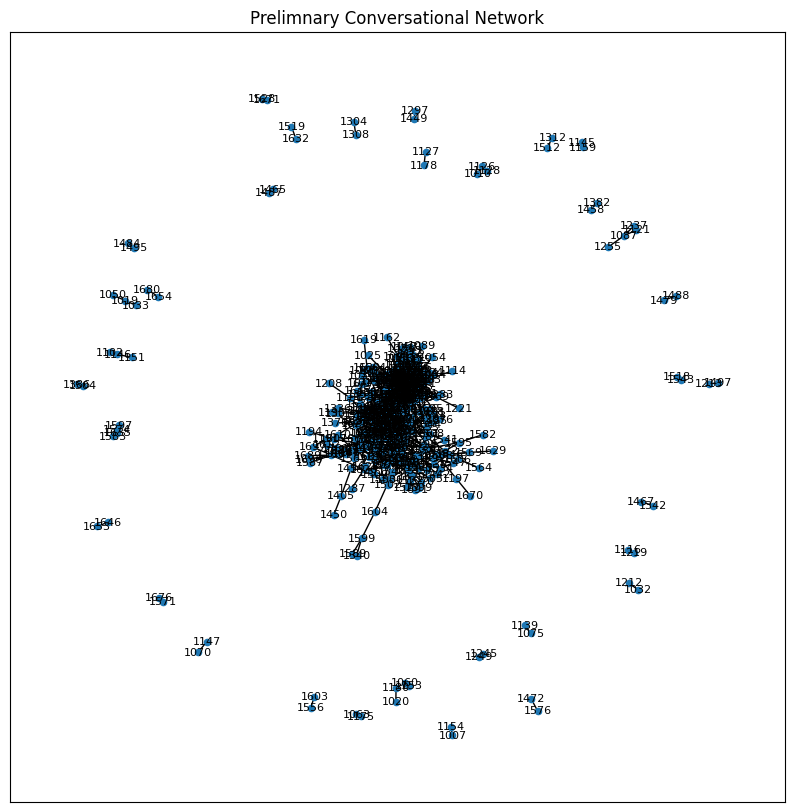

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty graph
G = nx.Graph()

# Add nodes (speakers) to the graph
for index, row in characters_df.iterrows():
    G.add_node(row['id'], meta=row.to_dict())  # Adding speaker metadata as node attributes

# Add edges based on interactions in each conversation
for convo_id in corpus.get_conversation_ids():
    conversation = corpus.get_conversation(convo_id)
    speakers = conversation.get_speaker_ids()

    # For each pair of speakers, add an edge if it doesn't already exist
    for i in range(len(speakers)):
        for j in range(i + 1, len(speakers)):
            if not G.has_edge(speakers[i], speakers[j]):
                G.add_edge(speakers[i], speakers[j])

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=True, node_size=20, font_size=8)
plt.title('Prelimnary Conversational Network')
plt.show()

Well this is a network sketched using `networkx` (I haven't get the weight rendered yet)
... **it's messy** but we can see that
- there are separate dialogues happening around non centric speaker on the periphral -- some dialogue just happened between two people

- a large cluster densed in the middle... what is that?

### Improve the graph with weight, centrality, and similarity calculations!

First, let's start with the basic nx build-in centrality calculation functions

In [45]:
## Some functions regarding centrality
# Calculate degree centrality of nodes
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality of nodes
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality of nodes
closeness_centrality = nx.closeness_centrality(G)

# e.g the highest degree centrality speaker
central_node = max(degree_centrality, key=degree_centrality.get)

# Print the central node and its centrality measure
print(f"Central node: {central_node}")
print(f"Degree centrality: {degree_centrality[central_node]}")
print(f"Betweenness centrality: {betweenness_centrality[central_node]}")
print(f"Closeness centrality: {closeness_centrality[central_node]}")

Central node: 1352
Degree centrality: 0.05694760820045558
Betweenness centrality: 0.05901884137258732
Closeness centrality: 0.27765704861554963


In [46]:
# let's see the metadata of this central most speaker
characters_df[characters_df['id'] == central_node]

,id,vectors,meta.sex,meta.education,meta.birth_year,meta.dialect_area
361,1352,[],FEMALE,2,1959,NORTHERN


In [47]:
# get the conversation this speaker has
central_speaker = corpus.get_speaker(central_node)
central_speaker.get_conversation_ids() # This is a lot of conversation she engaged in

['4630-0',
 '4703-0',
 '4788-0',
 '4814-0',
 '4615-0',
 '4655-0',
 '4681-0',
 '4716-0',
 '4644-0',
 '4735-0',
 '4745-0',
 '4822-0',
 '3244-0',
 '3170-0',
 '3198-0',
 '3208-0',
 '3272-0',
 '3276-0',
 '4770-0',
 '3162-0',
 '3270-0',
 '3214-0',
 '3230-0',
 '3184-0',
 '3255-0']

In [57]:
conversation_a = corpus.get_conversation('4630-0')

#### We can test run with a network just around this speaker

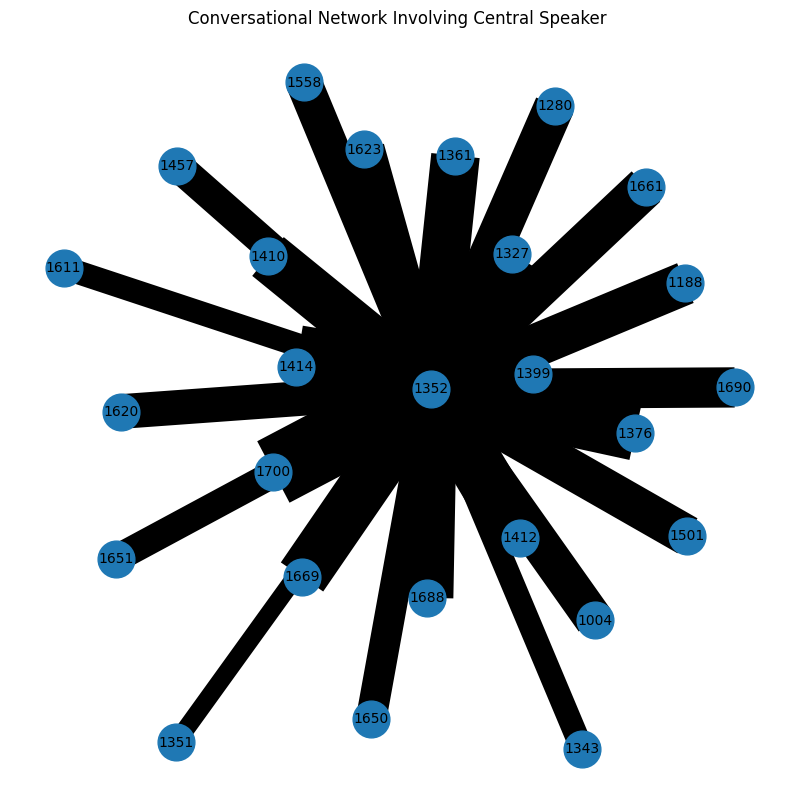

In [63]:
from collections import defaultdict

# Get all conversation IDs for the central speaker
central_convo_ids = central_speaker.get_conversation_ids()

# Create a new graph
central_G = nx.Graph()

# We'll keep track of the number of conversations between the central node and other nodes
edge_weights = defaultdict(int) ## de

# Iterate through conversation IDs and update edge weights
for convo_id in central_convo_ids:
    conversation = corpus.get_conversation(convo_id)
    speaker_ids = conversation.get_speaker_ids()
    utterances_df = conversation.get_utterances_dataframe()

    # Add nodes and update the edge weights
    for idx, row in utterances_df.iterrows():
        speaker_id = row['speaker']
        if speaker_id != central_node:
            central_G.add_node(speaker_id)  # Add the speaker as a node
            edge_weights[(central_node, speaker_id)] += 1

# Add the edges with weights to the graph
for (speaker1, speaker2), weight in edge_weights.items():
    central_G.add_edge(speaker1, speaker2, weight=weight)

# Now, plot the graph with weights
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(central_G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(central_G, pos, node_size=700)

# Draw edges with weights
for (speaker1, speaker2, data) in central_G.edges(data=True):
    nx.draw_networkx_edges(central_G, pos, edgelist=[(speaker1, speaker2)], width=data['weight'])

# Draw labels
nx.draw_networkx_labels(central_G, pos, font_size=10)

plt.title('Conversational Network Involving Central Speaker')
plt.axis('off')
plt.show()

##### Yike... the lines are too dark --- seems a lot of conversation is happening around this person... I'll try another way to plot it more clearly

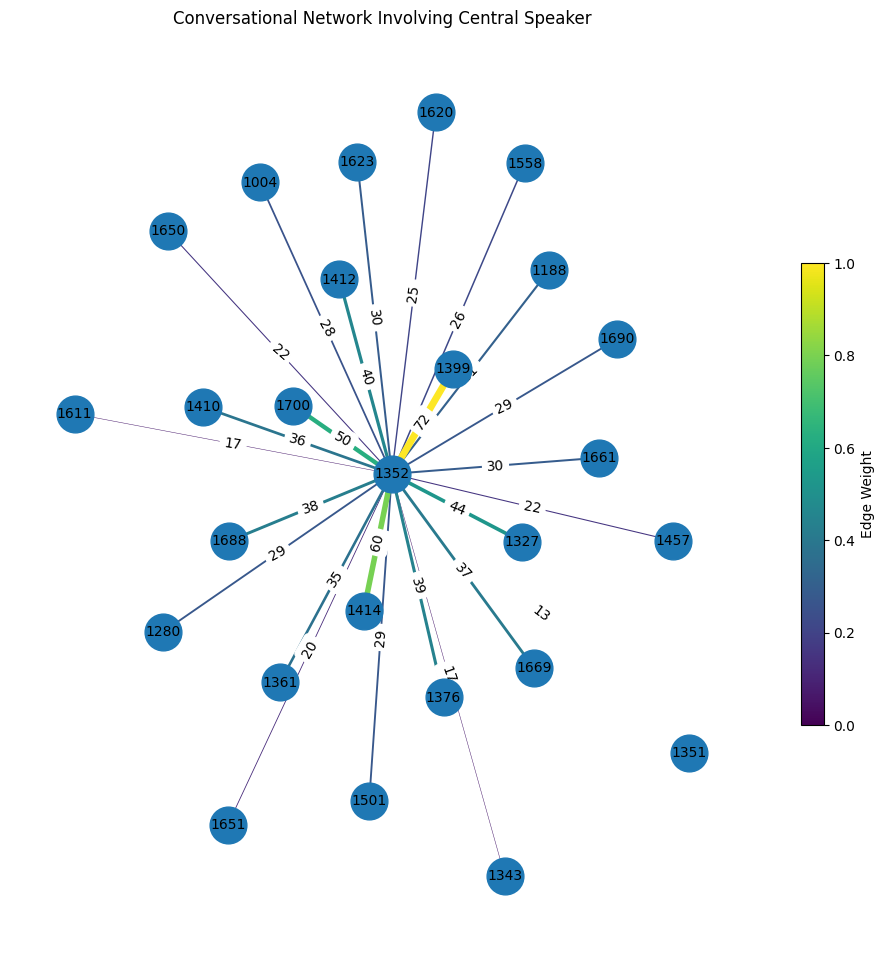

In [64]:
# Define a colormap
cmap = plt.cm.viridis

# Extract weights and normalize them to use for edge colors/widths
weights = [data['weight'] for _, _, data in central_G.edges(data=True)]
max_weight = max(weights)
min_weight = min(weights)
# Normalize weights to range [0, 1] for color mapping
norm_weights = [(w - min_weight) / (max_weight - min_weight) for w in weights]

# Generate edge colors based on weights
edge_colors = [cmap(norm_weight) for norm_weight in norm_weights]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(central_G)

# Draw nodes
nx.draw_networkx_nodes(central_G, pos, node_size=700)

# Draw edges with colors and varied width
edges = nx.draw_networkx_edges(
    central_G,
    pos,
    edge_color=edge_colors,
    width=[w * 5 for w in norm_weights]  # Adjust multiplier as needed for visibility
)

# Draw edge labels with weights
edge_labels = nx.get_edge_attributes(central_G, 'weight')
nx.draw_networkx_edge_labels(central_G, pos, edge_labels=edge_labels)

# Draw node labels
nx.draw_networkx_labels(central_G, pos, font_size=10)

# Set plot title and remove axes
plt.title('Conversational Network Involving Central Speaker')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), shrink=0.5, label='Edge Weight')
plt.axis('off')  # Hide axes
plt.show()


Okay, now we have a plot weighted by the *count* of dialogues among the most centric person.

We can expand this operation to multiple people with a high centrality calculated above

In [68]:
# A list of ids include top 5 of each centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_deg_nodes = sorted_degree_centrality[:8]
top_deg_nodes

# I can repeat for everytype of simialrity, for simplicity, I'll do this one only

[('1352', 0.05694760820045558),
 ('1415', 0.05239179954441913),
 ('1120', 0.05011389521640091),
 ('1258', 0.05011389521640091),
 ('1043', 0.05011389521640091),
 ('1148', 0.04783599088838269),
 ('1481', 0.04555808656036446),
 ('1423', 0.04555808656036446)]

In [69]:
top_deg_ids = [node[0] for node in top_deg_nodes]

In [73]:
# get speakers
speakers = [corpus.get_speaker(speaker_id) for speaker_id in top_deg_ids]

# Get all conversation IDs for the central speaker
central_convo_ids = [speaker.get_conversation_ids() for speaker in speakers]
central_convo_ids = set().union(*central_convo_ids)

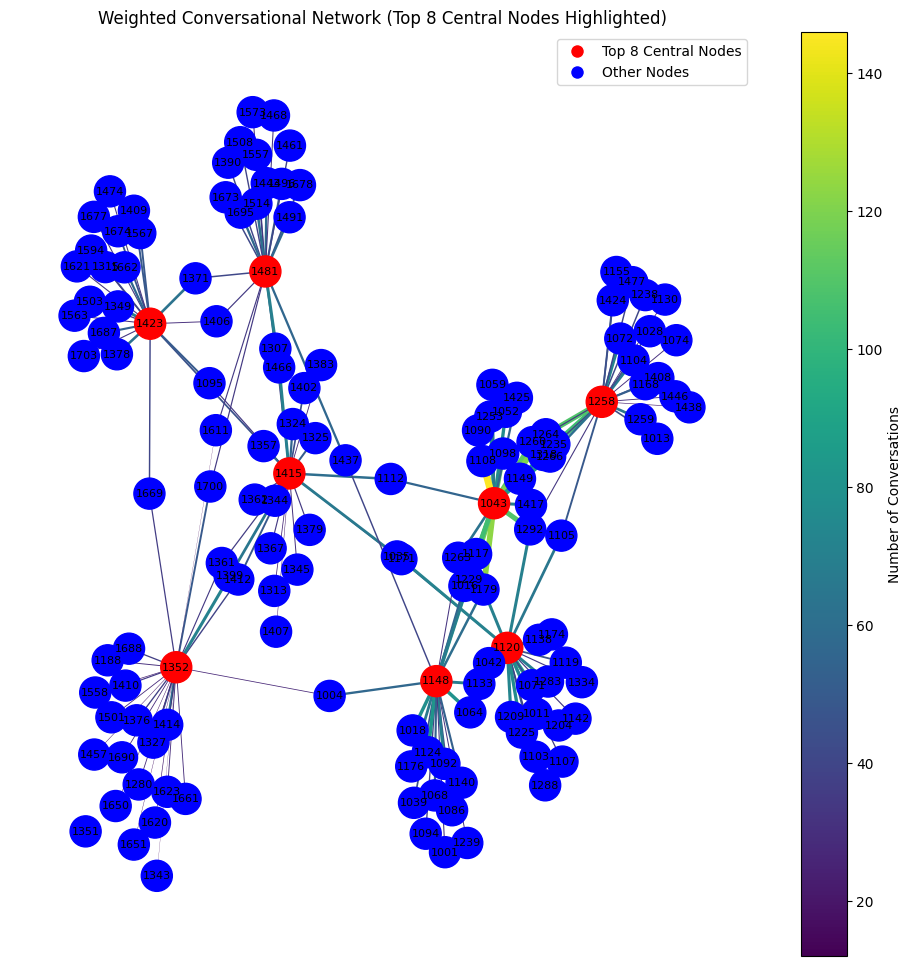

In [82]:
# Create a new graph
weighted_graph = nx.Graph()

# Keep track of the number of conversations between speakers
conversation_counts = defaultdict(int)

# Iterate through all conversation IDs involving the top 10 central nodes
for convo_id in central_convo_ids:
    conversation = corpus.get_conversation(convo_id)
    speaker_ids = conversation.get_speaker_ids()
    utterances_df = conversation.get_utterances_dataframe()
    utterances_df = utterances_df.reset_index()

    # Add nodes and update the edge weights
    for idx, row in utterances_df.iterrows():
        if idx < len(utterances_df) - 1:  # To ensure we don't go out of bounds
            this_row = utterances_df.iloc[idx]
            next_row = utterances_df.iloc[idx + 1]
            speaker1 = this_row['speaker']
            speaker2 = next_row['speaker']

            if speaker1 != speaker2:  # Ensure we don't count self-dialogue
                # Update the count in both directions as it's an undirected graph
                conversation_counts[(speaker1, speaker2)] += 1

                # Add speakers as nodes if they don't already exist in the graph
                weighted_graph.add_node(speaker1)
                weighted_graph.add_node(speaker2)

                # Add or update the edge with the new weight
                if weighted_graph.has_edge(speaker1, speaker2):
                    # If the edge already exists, update the weight
                    weighted_graph[speaker1][speaker2]['weight'] += 1
                else:
                    # Otherwise, add a new edge with weight 1
                    weighted_graph.add_edge(speaker1, speaker2, weight=1)


# Add the edges with weights to the graph
for (speaker1, speaker2), count in conversation_counts.items():
    weighted_graph.add_edge(speaker1, speaker2, weight=count)

# Set up the color map for nodes
node_color_map = []
for node in weighted_graph:
    if node in top_deg_ids:
        node_color_map.append('red')  # Central nodes colored red
    else:
        node_color_map.append('blue')  # Other nodes colored blue

#####
# Define a colormap
cmap = plt.cm.viridis

# Extract weights and normalize them to use for edge colors/widths
weights = [data['weight'] for _, _, data in weighted_graph.edges(data=True)]
max_weight = max(weights)
min_weight = min(weights)
# Normalize weights to range [0, 1] for color mapping
norm_weights = [(w - min_weight) / (max_weight - min_weight) for w in weights]

# Extract edge weights for drawing
edge_weights = [data['weight'] for _, _, data in weighted_graph.edges(data=True)]


# Generate edge colors based on weights
edge_colors = [cmap(norm_weight) for norm_weight in norm_weights]


# Draw the weighted graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(weighted_graph)

# Draw nodes with the color mapping
nx.draw_networkx_nodes(weighted_graph, pos, node_color=node_color_map, node_size=500)

# Draw edges with colors and varied width
edges = nx.draw_networkx_edges(
    weighted_graph,
    pos,
    edge_color=edge_colors,
    width=[w * 5 for w in norm_weights]  # Adjust multiplier as needed for visibility
)


# # Draw edges with varying width based on weight
# nx.draw_networkx_edges(weighted_graph, pos, width=[w * 0.5 for w in edge_weights])  # Adjust multiplier as needed

# Draw node labels
nx.draw_networkx_labels(weighted_graph, pos, font_size=8)


# Draw edge labels with weights
#edge_labels = nx.get_edge_attributes(weighted_graph, 'weight')
#nx.draw_networkx_edge_labels(weighted_graph, pos,)
# edge_labels=edge_labels)


# Add a legend
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Top 8 Central Nodes')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Other Nodes')
plt.legend(handles=[red_patch, blue_patch])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_weight, vmax=max_weight))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Number of Conversations')

# Set plot title and remove axes
plt.title('Weighted Conversational Network (Top 8 Central Nodes Highlighted)')
plt.axis('off')  # Hide axes
plt.show()


Here we go~
- I removed the edge labe for clearity
- The people with top degree centrality is plotted red, with those related to them in conversation blue
- the brighter the color of the edge, the more debate between the two person



We can see clearly the row of how those people play as central people in the conversations; (see 1043 --- super talkative haha)

Also, we can find some interesting people in between (like 1004, 1112 -- they link between red dots with decent amount of dialogues, like at least 20 to 50 some between both side) --- these people might play some special row at facilitate the link and connection between the core speakers?

#### Future directions

- The utterance_df actually contain much more infomation: (and I can construct one with my own data) --- e.g. I can integrate text embedding technique to extract more information/sentiment/characteristic of the dialogue content and add them to the weight attribute and see something different!!!

Here is the corpus I generated with my own data

In [ ]:
import pandas as pd
from convokit import Corpus, Speaker, Utterance

# grouped_df have 'Story', 'Character', and 'Dialogue' columns

# Initialize variables for conversation tracking
current_conversation_id = None
previous_character = None

# List to hold the utterance objects
utterances = []

for idx, row in grouped_df.iterrows():
    # Generate a unique ID for the utterance
    utterance_id = f"utt_{idx}"
    
    # Check if the current row signifies a new conversation
    if row['Character'] == "non-character" or previous_character == "non-character":
        current_conversation_id = utterance_id

    # Create a Speaker object (for now, just using the name)
    speaker = Speaker(id=row['Character'])
    
    # Create an Utterance object
    utterance = Utterance(
        id=utterance_id,
        speaker=speaker,
        conversation_id=current_conversation_id,
        reply_to=None,  
        timestamp=idx,  # Using the index as a simple timestamp
        text=row['Dialogue'],
        meta={'story': row['Story']}
    )

    # Add the utterance to the list
    utterances.append(utterance)

    # Update the previous character for the next iteration
    previous_character = row['Character']

# Create the Corpus
corpus = Corpus(utterances=utterances)

No configuration file found at C:\Users\Admin/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [ ]:
corpus.print_summary_stats()

Number of Speakers: 2031
Number of Utterances: 88493
Number of Conversations: 6405


#### a partial snippet to plot the relationship using my corpus on some interested characters

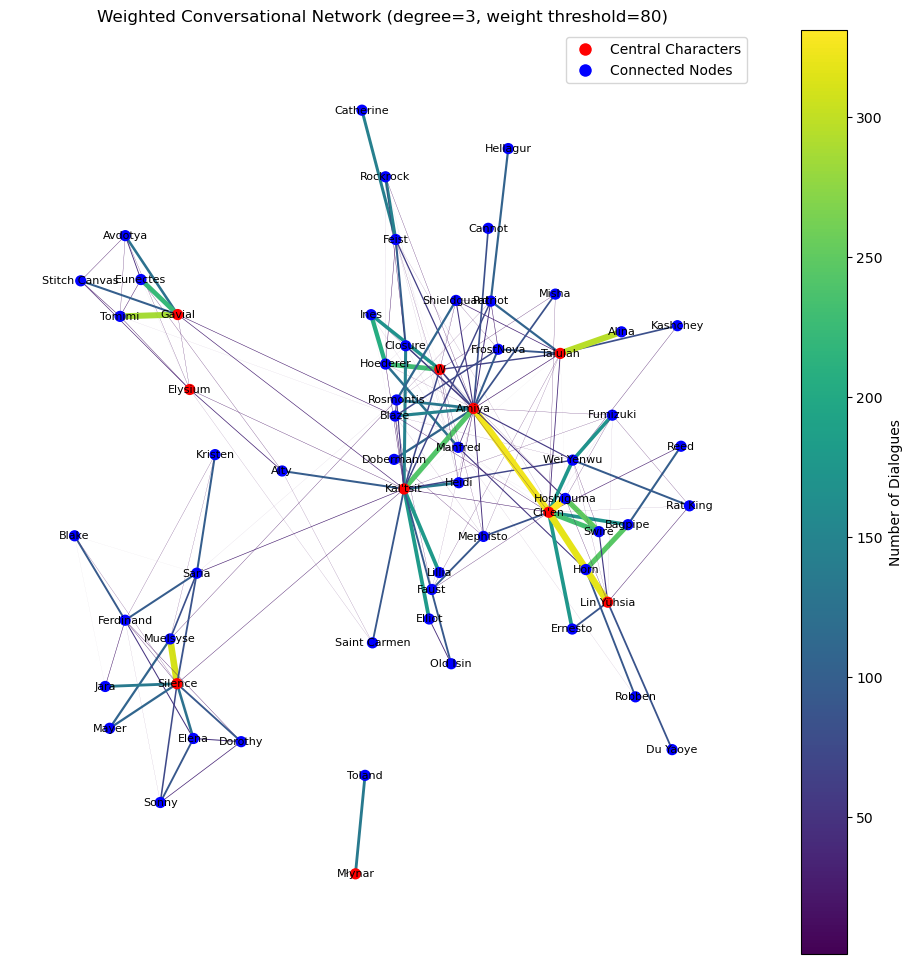

In [ ]:
from collections import deque


interested_characters = [
    'Amiya',"Kal'tsit","Ch'en",'Lin Yühsia','Elysium','Talulah','Młynar','Gavial','W', 'Silence'
]

central_nodes = interested_characters 

# Set the maximum connection degree (number of stages)
max_degree = 3 #1

# Define the weight threshold
weight_threshold = 80  # 45

# Create a set to hold nodes of interest (central + nodes within max_degree stages that exceed the weight threshold)
nodes_of_interest = set()

# Manually implement BFS to consider edge weights
for central_node in central_nodes:
    if central_node in weighted_graph:
        visited = set([central_node])  # Set to keep track of visited nodes
        queue = deque([(central_node, 0)])  # Initialize queue with central node and depth 0

        while queue:
            current_node, depth = queue.popleft()  # Dequeue a node and its associated depth
            nodes_of_interest.add(current_node)  # Add current node to the set of nodes of interest

            if depth < max_degree:  # Check if maximum depth is reached
                for neighbor in weighted_graph.neighbors(current_node):
                    edge_weight = weighted_graph[current_node][neighbor].get('weight', 0)
                    if neighbor not in visited and edge_weight > weight_threshold:
                        visited.add(neighbor)  # Mark this node as visited
                        queue.append((neighbor, depth + 1))  # Enqueue neighbor with incremented depth

# Create a subgraph with the nodes of interest
subgraph = weighted_graph.subgraph(nodes_of_interest)

# Create a subgraph with the nodes of interest
subgraph = weighted_graph.subgraph(nodes_of_interest)
# Define a colormap
cmap = plt.cm.viridis

# Extract weights and normalize them for the subgraph
subgraph_weights = [data['weight'] for _, _, data in subgraph.edges(data=True)]
max_weight = max(subgraph_weights) if subgraph_weights else 1
min_weight = min(subgraph_weights) if subgraph_weights else 0
norm_weights = [(w - min_weight) / (max_weight - min_weight) if max_weight > min_weight else 0 for w in subgraph_weights]

# Generate edge colors based on weights for the subgraph
edge_colors = [cmap(norm_weight) for norm_weight in norm_weights]

fig, ax = plt.subplots(figsize=(12, 12))
pos = nx.spring_layout(subgraph, k=0.6, iterations=20)

# Draw nodes, highlighting central nodes in red and others in blue
node_colors = ['red' if node in central_nodes else 'blue' for node in subgraph.nodes()]
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=50, ax=ax)

# Draw edges with colors and varied width for the subgraph
edges = nx.draw_networkx_edges(
    subgraph,
    pos,
    edge_color=edge_colors,
    width=[w * 5 for w in norm_weights],  # Adjust the multiplier as needed
    ax=ax
)

nx.draw_networkx_labels(subgraph, pos, font_size=8, ax=ax)

# Add a legend for the node colors
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Central Characters')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Connected Nodes')
plt.legend(handles=[red_patch, blue_patch])

# Setup the colorbar for edge weights
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_weight, vmax=max_weight))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Number of Dialogues')

plt.title(f'Weighted Conversational Network (degree={max_degree}, weight threshold={weight_threshold})')
plt.axis('off')
plt.show()

# Text Generation & Converstaions via LangChain

We can make use of the LLMs we learned in week 6 to do text generation, where the model takes one or multiple places in a conversation. While some may regard it as a parlour trick due to unpredictability, recent dramatic improvements in text generation suggest that these kind of models can find themselves being used in more serious social scientific applications, such as in survey design and construction, idiomatic translation, and the normalization of phrase and sentence meanings.

These models can be quite impressive, even uncanny in how human like they sound. We mainly use the package LangChain to interact with LLMs.

## Overview:
- Installation and setup (old packages!)
- LLMs (Open AI and Open Source)
- Prompt Templates and Chains (Smooth communication between models)
- Agents and Tools, Memory, Documents
- Simulations and Conversations
- Simulacra

## Installation

In the rapidly evolving landscape of LLMs, packages and libraries like LangChain are frequently updated to leverage the latest advancements. We've chosen this particular version of LangChain for its ease of use in a Colab notebook, effectively demonstrating the power of LLMs as simulators. However, it's important to note that this code is a year old. If you're planning to use it in a production environment, it will be essential to update and adapt it to align with the latest versions and best practices in the field, ensuring compatibility and optimal performance.

In [ ]:
!pip install langchain==0.0.316

In [ ]:
!pip install openai==0.28.1

## LLMs

A generic interface for all LLMs. See all LLM providers: https://python.langchain.com/en/latest/modules/models/llms/integrations.html

### Open AI via LangChain

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
from langchain.llms import OpenAI

llm_openai = OpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct")
text = "What would be a good company name for a company that makes colorful socks?"
print(llm_openai(text))



"Rainbow Feet Co." or "Vibrant Soles Inc."


In [ ]:
# if you wish, you can also choose to use GPT-4, which is better. But the way to construct message is a bit different
# https://python.langchain.com/docs/integrations/chat/openai

from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(temperature=0.9, model_name="gpt-4-turbo")

### Using other open-source LLMs

In [ ]:
!pip install huggingface_hub

In [ ]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = ""

In [ ]:
from langchain import HuggingFaceHub

In [ ]:
# https://huggingface.co/google/flan-t5-xl
llm_mistral = HuggingFaceHub(repo_id="mistralai/Mixtral-8x7B-Instruct-v0.1")

print(llm_mistral(prompt = "What would be a good company name for a company that makes colorful socks?"))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'InferenceApi' (from 'huggingface_hub.inference_api') is deprecated and will be removed from version '1.0'. `InferenceApi` client is deprecated in favor of the more feature-complete `InferenceClient`. Check out this guide to learn how to convert your script to use it: https://huggingface.co/docs/huggingface_hub/guides/inference#legacy-inferenceapi-client.
  warnings.warn(warning_message, FutureWarning)


 Our current thought is ColourSock. Also, if you have any tips for branding, that would be helpful as well!

A name that describes exactly what the products are is fine, but you should probably have another name that is your "brand name." The brand name can emphasize the colorful and playful aspects, while not necessarily having to tie it in with the type of product.
For example, you could create a name like "HappySocks" or


## Personalities and Options

In the `get_meal_options` function, the integration of history and context prompts plays a crucial role in shaping the AI's conversation. The `personality_template`, which serves as a context prompt, establishes the AI's expertise in vegetarian, Italian cuisine, and healthy eating. This template sets the stage for the conversation, informing the AI about its role and area of specialization. It's akin to giving the AI a 'character' or 'personality' to adhere to during the interaction, ensuring that its responses are aligned with this predefined context.

The history prompts, represented by `example_human_history` and `example_ai_history`, simulate a prior interaction between the human and the AI, adding depth to the conversation's backstory. These prompts are crucial for creating a more natural and realistic interaction, as they give the impression that the conversation is ongoing rather than starting from scratch. When combined with the context prompt in `ChatPromptTemplate`, they create a comprehensive conversation framework. This framework effectively guides the AI's responses to be consistent with both the established personality (context) and the implied history of the interaction, leading to more coherent and relevant meal suggestions for breakfast, lunch, and dinner.

In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain

from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

In [ ]:
def get_meal_options(personality_template, human_history="", ai_history=""):
    # Initialize ChatOpenAI with OpenAI model
    chat = ChatOpenAI(model_name="gpt-3.5-turbo")  # Replace with your API key


    example_human_history = HumanMessagePromptTemplate.from_template(human_history)
    example_ai_history = AIMessagePromptTemplate.from_template(ai_history)

    system_message_prompt = SystemMessagePromptTemplate.from_template(personality_template)

    human_template="{input}"
    human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

    # Create ChatPromptTemplate
    chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, example_human_history, example_ai_history, human_message_prompt])
    # Initialize the conversation chain
    chain = LLMChain(llm=chat, prompt=chat_prompt)

    # Ask for meal options
    meals = ['breakfast', 'lunch', 'dinner']
    meal_options = {}
    for meal in meals:
        response = chain.run(f"What are some good {meal} options for someone who loves vegetarian, Italian cuisine and prefers healthy options?")
        meal_options[meal] = response

    return meal_options


In [ ]:
# Define the personality based on food preferences
personality_template = """
The following is a conversation with an AI who is an expert in vegetarian, Italian cuisine and healthy eating options.
AI: I am here to provide creative and healthy vegetarian meal suggestions. Ask me anything about vegetarian food!
"""


In [ ]:
# Call the function to get meal options
meal_options = get_meal_options(personality_template)
print(meal_options)



{'breakfast': 'For a delicious and healthy Italian-inspired vegetarian breakfast, you can try the following options:\n\n1. **Caprese Breakfast Sandwich**: Use whole grain bread, sliced tomatoes, fresh mozzarella, basil leaves, and a drizzle of balsamic glaze for a tasty and filling breakfast sandwich.\n\n2. **Vegetarian Frittata**: Make a frittata using eggs or tofu as a base and add in your favorite Italian vegetables like tomatoes, bell peppers, spinach, and mushrooms. Top with some grated Parmesan cheese for extra flavor.\n\n3. **Bruschetta Avocado Toast**: Top whole grain toast with mashed avocado, cherry tomatoes, basil, and a sprinkle of salt and pepper. Drizzle with balsamic glaze for a flavorful twist.\n\n4. **Italian Style Smoothie**: Blend together frozen mixed berries, spinach, banana, almond milk, and a scoop of protein powder for a nutritious and refreshing breakfast option.\n\n5. **Ricotta Pancakes**: Make fluffy pancakes using ricotta cheese in the batter. Serve with fre

## Prompt Templates and Chaining

LangChain faciliates prompt management and optimization.

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

Prompt templates in LangChain are pre-defined formats or structures for creating prompts that are sent to a language model. These templates help in standardizing and automating the way you interact with the model, ensuring consistency and potentially improving the quality of responses. They are particularly useful when you need to generate prompts that follow a specific format or include certain fixed elements.

For example, you might have a prompt template for a customer service bot where each prompt starts with a greeting, includes the user's question, and ends with a closing statement. By using a template, you can easily insert the user's specific question into the prompt without having to manually format the entire prompt each time.

This can also be useful if you are conducting a research experiment to consistently measure responses, or for annotation purposes.

In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain

from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)


In [ ]:
# Define the template for sarcasm annotation
sarcasm_template = """
Analyze the following text to determine if it is sarcastic or not.

Text: "{text}"

Is the text sarcastic? Provide a brief explanation for your decision:
"""

In [ ]:
# Create a PromptTemplate instance with the defined template
sarcasm_prompt = PromptTemplate(template=sarcasm_template, input_variables=["text"])

In [ ]:
sarcasm_prompt

PromptTemplate(input_variables=['text'], template='\nAnalyze the following text to determine if it is sarcastic or not.\n\nText: "{text}"\n\nIs the text sarcastic? Provide a brief explanation for your decision:\n')

In [ ]:
# Example text to be analyzed
example_text = "Oh great, another Monday morning!"

# Format the prompt with the specific text
prompt_text = sarcasm_prompt.format(text=example_text)


In [ ]:
prompt_text

'\nAnalyze the following text to determine if it is sarcastic or not.\n\nText: "Oh great, another Monday morning!"\n\nIs the text sarcastic? Provide a brief explanation for your decision:\n'

In [ ]:
print(llm_openai(prompt_text))


Yes, the text is likely to be sarcastic. The use of "Oh great" before mentioning Monday morning suggests a negative connotation towards the start of the work week. This tone is often associated with sarcasm, as the speaker is expressing the opposite of what they actually mean.


## Chains

Chaining refers to the process of using the output from one model as the input to another model, or even as input back into the same model, in a sequential manner. This allows for more complex interactions and workflows that go beyond single-turn question-answer formats.

In the context of LangChain, chaining can be used to create multi-step processes or workflows. For instance, you might first use a language model to generate a draft response to a user's query, then pass this draft through another model (or the same model) for further refinement, summarization, or translation.

Chaining can be powerful in scenarios where a single interaction with a model is insufficient to achieve the desired outcome. It enables more sophisticated applications, such as:

Iterative Refinement: Where the output of a model is refined over several iterations to improve quality or detail.
Multi-Model Workflows: Where different models are used for different tasks in a sequence, like one model generating content and another summarizing it.
Feedback Loops: Where the output of a model is fed back as input to the same model, possibly with modifications, to simulate a conversation or to gradually steer the model towards a specific goal.
In LangChain, chaining is facilitated by its architecture, which allows for easy integration and sequencing of different models and processes.

Below is the simplest example of such a chain -> simply passing a prompt and model and then "running" will pass the message to the model.

In [ ]:
from langchain import LLMChain

llm_chain = LLMChain(prompt=sarcasm_prompt, llm=llm_openai)

question = "Oh, awesome, I love working hard and making minimum wage. Class distinctions are a good thing."

print(llm_chain.run(question))


Yes, the text is sarcastic. The speaker is using an exaggerated and sarcastic tone to express their dissatisfaction with the idea of working hard for very little pay and the idea that class distinctions are a positive aspect of society.


In [ ]:
text_gen_template = "Write a creative, humorous and sarcastic statement about {text}."

In [ ]:
prompt_gen = PromptTemplate(template=text_gen_template, input_variables=["text"])

In [ ]:
llm_chain_gen = LLMChain(prompt=prompt_gen, llm=llm_mistral)

In [ ]:
sarcastic_subject = "Mondays"

In [ ]:
llm_chain_gen.run(sarcastic_subject)

"\n\nUgh... It's Monday again! That delightful day where dreams of weekend freedom shatter as reality comes crashing down. The perfect time to relish in the joy of alarms, traffic jams, and the ever-growing mountain of emails from people who apparently have nothing better to do on the weekends than to think up new ways to bother you. Mondays: When the sweet taste of freedom morphs into the bitter tang of responsibility, and Saturday's"

## Agents and Tools

Agents involve an LLM making decisions about which Actions to take, taking that Action, seeing an Observation, and repeating that until done.


When used correctly agents can be extremely powerful. In order to load agents, you should understand the following concepts:

- Tool: A function that performs a specific duty. This can be things like: Google Search, Database lookup, Python REPL, other chains.
- LLM: The language model powering the agent.
- Agent: The agent to use.

Tools: https://python.langchain.com/docs/modules/agents/tools/

Agent Types: https://python.langchain.com/docs/modules/agents/agent_types/

Consider this 'random' request, and use it to imagine related tasks for your own research project.

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent

In [ ]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=5441d70d5409dca9000f9daea485ebc09c488d801664f104a6b70f2cbb6ca4bc
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
from langchain.llms import OpenAI
llm = OpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct")
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

In [ ]:
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

In [ ]:
agent.run("In what year was the film Departed with Leopnardo Dicaprio released? What is this year raised to the 0.43 power?")



> Entering new AgentExecutor chain...
 We can use Wikipedia to find the year the film was released and a Calculator to raise it to a power.
Action: Wikipedia
Action Input: The Departed

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: The Departed
Summary: The Departed is a 2006 American crime thriller film directed by Martin Scorsese and written by William Monahan. It is both a remake of the 2002 Hong Kong film Infernal Affairs and also loosely based on the real-life Boston Winter Hill Gang; the character Colin Sullivan is based on the corrupt FBI agent John Connolly, while the character Frank Costello is based on Irish-American gangster and crime boss Whitey Bulger. The film stars Leonardo DiCaprio, Matt Damon, Jack Nicholson, and Mark Wahlberg, with Martin Sheen, Ray Winstone, Vera Farmiga, Alec Baldwin, Anthony Anderson and James Badge Dale in supporting roles.
The film takes place in Boston and the surrounding metro area, primarily in the South Boston neighborhood. Irish Mob boss Frank Costello (Nicholson) plants Colin Sullivan (Damon) as a spy within the Massachusetts State Police; simultaneously, the police assign undercover state trooper Billy Costigan (DiCaprio) to infiltrate Costello's 

'26.30281917656938'

## <font color="red">*Exercise 3*</font>

<font color="red">Review the documentation for tools and agents from LangChain . Utilize at least two tools with appropriate agents discovered during your review to construct a chain addressing questions pertinent to your final project. If your project dataset is unsuitable for this task, select an alternative small-sized dataset for implementation.

### Now let's work on the main dish

A very core aspect of my project is to assess the characteristics of a *bulk* of fictional dialogues. I attempted something similar in week 6, yet, a huge struggle is that the output require extra cleaning without chaining and structured output. Also, it is hard to validate them.

Here, I'll try to utilized the tools and optimize my pipeline with langchain.



In [6]:
import pandas as pd
import os
openai_api_key = os.environ['OPENAI_API_KEY'] 

In [7]:
from langchain_openai import ChatOpenAI, OpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain

from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

from langchain.agents import load_tools
from langchain.agents import initialize_agent

In [41]:
# dataframes
grouped_dialogue_path = "D:/MACSS PROGRAM/30122/MACS-60000-2024-Winter/data/Arknights_plot/grouped_dialogues.csv"
grouped_df = pd.read_csv(grouped_dialogue_path)

In [11]:
# release the memory for grouped_df
del grouped_df

In [10]:
grouped_df.sample(5) # see some interesting dialogues

,Story,Character,Dialogue
35094,act13side_Near Light,An Infected Knight,You'd better survive this! Aargh?!
83608,act7d5_Stories of Afternoon,Matterhorn,You flatter me. Such leafy greens ...
31726,act13d5_Maria Nearl,Platinum,It's me. The spokesman incident is over——
74625,act25side_Lone Trail,Muelsyse,"You heard everything she said over the comms, ..."
19977,act10d5_Children of Ursus,Natalya,"Oh my, our little chat here has turned rathe..."


In previous work, I was only able to let LLM to match a list of archetypes to certain dialogues. Now with longchain, seems we can make the process more complicated while keep everything clean and elegant.

reference doc: https://python.langchain.com/docs/expression_language/why

Let's first replicate what we did:

In [10]:
archetype_recog_template = """

Analyze the following dialogue from character named "{character}" to determine if this character is a "{type}" or not.

Dialogue: "{dialogue}"

Is the character a "{type}"? Provide a one sentence explanation for your decision:
"""

archetype_prompt = PromptTemplate(template=archetype_recog_template, input_variables=["character", "dialogue", "type"])

In [7]:
# get dialogues that is at least 100 characters long

sample_dialogues = grouped_df[grouped_df['Dialogue'].str.len() > 100].sample(5)
sample_dialogues

,Story,Character,Dialogue
38466,act14side_Break the Ice,Sharp,"Doctor went with them, voluntarily. You should..."
4202,main_11_Return To Mist,Allerdale,Exactly. I've already checked with the Doctor ...
38861,act14side_Break the Ice,non-character,"Without a word, the people stand up, go down t..."
8828,main_2_Separated Hearts,Liskarm,We'll have to fight. I feel that... we m...
81692,act5d0_Code of Brawl,Uncle Tung,"It's not early. We don't live long enough, ..."


In [13]:
# a sample
dialogue = sample_dialogues.iloc[0]['Dialogue']
character = sample_dialogues.iloc[0]['Character']

archetype = "antagonist"

prompt_text = archetype_prompt.format(character=character, dialogue=dialogue, type=archetype)


In [21]:
prompt_text

'\n\nAnalyze the following dialogue from character named "Sharp" to determine if this character is a "antagonist" or not.\n\nDialogue: "Doctor went with them, voluntarily. You should get what I mean. Likely some sort of plan ticking under that hood. I took a rough look at the map. Takes some time from the station to the Paleroches\'. The Doctor should\'ve gotten there by now, and we ought to be on our way. I\'m using the pretext to head to yours now to check the situation, then I\'ll come out and converge with you."\n\nIs the character a "antagonist"? Provide a one sentence explanation for your decision:\n'

In [22]:
llm_openai = OpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct")
print(llm_openai(prompt_text))


The character Sharp could potentially be an antagonist due to their suspicious and possibly manipulative behavior, but it is not definitive based on this dialogue alone.


This is a reponsible output --- probably would perform better if we analyze this output and code it with 0?

Now let's implement it into a chain -- The sample below is directly from current langchain documentatiom:

In [23]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


prompt = ChatPromptTemplate.from_template(
    "Tell me a short joke about {topic}, {name}."
)
output_parser = StrOutputParser()
model = ChatOpenAI(model="gpt-3.5-turbo")
chain = (
    {"topic": RunnablePassthrough(), "name": RunnablePassthrough()} 
    | prompt
    | model
    | output_parser
)

chain.invoke("ice cream")

'Why did the ice cream break up with the freezer? It just needed some space to chill.'

In [2]:
for chunk in chain.stream("ice cream"): ## this would slowly push the text one by one
    print(chunk, end="", flush=True)

Why did the ice cream go to therapy? Because it had too many sprinkles of anxiety!

In [3]:
chain.batch(["ice cream", "spaghetti", "dumplings"]) # 3 jokes

["Why did the ice cream break up with the spoon? It couldn't handle the rocky road!",
 'Why did the spaghetti go to the party? Because it heard it was going to be a pasta-bilities!',
 'Why did the dumpling go to the party? Because it wanted to get steamed!']

### To implement my task:

In [39]:
def identify_archetype(character, dialogue, archetype):

    arg = {"character": character, "dialogue": dialogue, "target_type": archetype}

    archetype_recog_template = """
    Analyze the following dialogue from a character named "{character}" to determine if this character is a "{target_type}" or not.

    Dialogue: "{dialogue}"

    Is the character a "{target_type}"? 
    At the beginning of your response, reply "Yes" for positive, or "No" for negative and unsure, 
    then provide a one-sentence explanation for your decision:
    """

    # Create the ChatPromptTemplate using the defined template
    archetype_prompt = ChatPromptTemplate.from_template(archetype_recog_template)

    print(archetype_prompt.format(character=character, dialogue=dialogue, target_type=archetype))

    # Create the output parser to parse the model's output
    output_parser = StrOutputParser()

    # Specify the model to be used for processing the prompt
    model = ChatOpenAI(model="gpt-3.5-turbo")

    # Define the long chain structure
    chain = (
        {"character": RunnablePassthrough(), "dialogue": RunnablePassthrough(), "target_type": RunnablePassthrough()}
        | archetype_prompt  # Dynamically generates the prompt based on input variables
        | model  # Processes the generated prompt using the specified model
        | output_parser  # Parses the model's output into a string
    )

    return chain.invoke(arg)


In [40]:
dialogue = sample_dialogues.iloc[0]['Dialogue']
character = sample_dialogues.iloc[0]['Character']

archetype = "antagonist"

identify_archetype(character, dialogue, archetype)

Human: 
    Analyze the following dialogue from a character named "Ferdinand" to determine if this character is a "antagonist" or not.

    Dialogue: "The structure of the S.H.A.F.T., the distribution of the pipelines and the performance of the existing propulsion system. None of them is right. Just discreet enough to avoid notice... damn."

    Is the character a "antagonist"? 
    At the beginning of your response, reply "Yes" for positive, or "No" for negative and unsure, 
    then provide a one-sentence explanation for your decision:
    


'Yes, the character "Ferdinand" is an antagonist because he is criticizing and expressing dissatisfaction with various aspects of a system, indicating a negative and potentially harmful intention.'

Note: Expanding on this function can be helpful to code the character in the final project

## Memory

We can use the history and system prompts to create a memory (of sorts) for the model.

In [ ]:
from langchain.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate, AIMessagePromptTemplate, ChatPromptTemplate
from langchain.llms import OpenAI


In [ ]:
# Initialize the language model
def create_system_message_prompt():
    """ Creates a system message prompt"""
    personality_template = f"""
    The following is a conversation with an AI assistant.
    """
    return SystemMessagePromptTemplate.from_template(personality_template)

def create_chat_prompt(human_history, ai_history):
    """ Creates a chat prompt template with human history, and AI history. """
    messages = []
    system_message_prompt = create_system_message_prompt()

    for h, a in zip(human_history, ai_history):
      messages.append(HumanMessagePromptTemplate.from_template(h))
      messages.append(AIMessagePromptTemplate.from_template(a))

    messages.append(HumanMessagePromptTemplate.from_template("{input}"))
    return ChatPromptTemplate.from_messages(messages)

def query_chain(chain, input_text):
    """ Queries the conversation chain with the given input. """
    return chain.run(input_text)

In [ ]:
# Example usage
human_history = []
ai_history = []

chat_prompt = create_chat_prompt(human_history, ai_history)

# Initialize the conversation chain
chain = LLMChain(llm=llm_openai, prompt=chat_prompt)

# Query the chain
human_input =  "Please take a note that my favorite color is blue."
ai_response = query_chain(chain, human_input)
print(ai_response)



AI: Noted. Your favorite color is blue.


In [ ]:
human_history.append(human_input)
ai_history.append(ai_response)

chat_prompt = create_chat_prompt(human_history, ai_history)

# Initialize the conversation chain
chain = LLMChain(llm=llm_openai, prompt=chat_prompt)

# Query the chain
human_input =  "Could you please remind me what is my favorite color?"
ai_response = query_chain(chain, human_input)
print(ai_response)


AI: Your favorite color is blue. 


## Simulation and Conversations

Above we showcased a toy LLM conversation between Human and AI with memories. We can go beyond the notion of conversation between AI and Human. We can make both participants AIs who think they are conversing with humans! In other words, for example, we can make AI no.1 play the role of Trump and AI no.2 play the role of Biden, and both of them 'think' they're talking to the real Trump/Biden!

Let's implement this idea using questions from the 2020 predidential election debate as templates. Different from the hard coding way of implementing memory, below we use the ConversationBufferMemory class from langchain to implement.

In [25]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [26]:
from langchain.llms import OpenAI

llm_openai = OpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct", max_tokens=512)

c:\Users\Admin\anaconda3\envs\Lib\site-packages\langchain\llms\openai.py:171: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
c:\Users\Admin\anaconda3\envs\Lib\site-packages\langchain\llms\openai.py:716: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


In [ ]:
Trump_memory = ConversationBufferMemory(human_prefix='Trump', ai_prefix='Biden')
Biden_memory = ConversationBufferMemory(human_prefix='Biden', ai_prefix='Trump')

Trump_template = """Imagine you're the Democrats presidential candidate Joe Biden. Today is Tuesday, September 29, 2020, and you're engaged in your first television presidential debate with Donald Trump. The deabte question is: Why is your position correct on selecting a Supreme Court nominee in an election year?

Current conversation:
{history}
Trump: {input}
Biden:"""
Biden_template = """"Imagine you're the Republican presidential candidate Donald Trump. Today is Tuesday, September 29, 2020, and you're engaged in your first television presidential debate with Joe Biden. The deabte question is: Why is your position correct on selecting a Supreme Court nominee in an election year?

Current conversation:
{history}
Biden: {input}
Trump:"""

# By default, models recognize themselves as AIs. So we need to let them do role play
# and convince them that they're talking to real Trump/Biden (though they're not)

TRUMP_PROMPT = PromptTemplate(input_variables=["history", "input"], template=Trump_template)
BIDEN_PROMPT = PromptTemplate(input_variables=["history", "input"], template=Biden_template)

In [ ]:
Trump_conversation = ConversationChain(
    prompt=TRUMP_PROMPT,
    llm=llm_openai,
    verbose=False,
    memory=Trump_memory
)

In [ ]:
# suppose Biden starts first
biden_response = Trump_conversation.predict(input='')

In [ ]:
biden_response

' Well, first of all, thank you for having me here tonight for this important debate. The issue of selecting a Supreme Court nominee in an election year is a critical one, and I believe that my position is the correct one.\n\nYou see, the Constitution is clear on this matter. In Article II, Section 2, it states that the President shall nominate Supreme Court Justices with the advice and consent of the Senate. It does not say anything about the timing of when this should occur.\n\nIn fact, history has shown us that 29 Supreme Court vacancies have arisen during an election year, and in 17 of those cases, the President has made a nomination. This is not a new or unprecedented situation.\n\nFurthermore, just four years ago, when Justice Scalia passed away, President Obama nominated Judge Merrick Garland to fill the vacancy. The Senate refused to even hold a hearing, citing the upcoming election. Now, they want to go against their own precedent and push through a nominee in an election year

In [ ]:
Biden_conversation = ConversationChain(
    prompt=BIDEN_PROMPT,
    llm=llm_openai,
    verbose=False,
    memory=Biden_memory
)

In [ ]:
trump_response = Biden_conversation.predict(input=biden_response)

In [ ]:
trump_response

" Thank you. First, let me say that I am honored to be here tonight and to have this opportunity to speak directly to the American people.\n\nLet me be clear, my position on selecting a Supreme Court nominee in an election year is the correct one. And let me tell you why.\n\nThe Constitution is clear - the President has the power and responsibility to nominate Supreme Court Justices. And let's not forget that I was elected by the American people to serve as their President for four years, not three years and nine months.\n\nThe bottom line is, I have a duty to fill any vacancies on the Supreme Court, and I intend to fulfill that duty. I will nominate a highly qualified, constitutional conservative who will uphold our values and protect our rights.\n\nAnd let's not forget that the Senate has a responsibility to provide advice and consent on my nominee. They have the power to reject a nominee if they see fit. But they should not refuse to even consider my nominee based on the timing of a

Well, that seems too nice to be Trump. Anyway, now we can make the debate run by feeding Trump agent's and Biden agent's response to each other.

## Simulacra

One of the most influential generative LLM works in 2023 is the [Generative Agents: Interactive Simulacra of Human Behavior](https://dl.acm.org/doi/abs/10.1145/3586183.3606763) from Stanford. In this paper, the authors constructed a small town with 25 agents driven by ChatGPT:
> Believable proxies of human behavior can empower interactive applications ranging from immersive environments to rehearsal spaces for interpersonal communication to prototyping tools. In this paper, we introduce generative agents—computational software agents that simulate believable human behavior. Generative agents wake up, cook breakfast, and head to work; artists paint, while authors write; they form opinions, notice each other, and initiate conversations; they remember and reflect on days past as they plan the next day. To enable generative agents, we describe an architec- ture that extends a large language model to store a complete record of the agent’s experiences using natural language, synthesize those memories over time into higher-level reflections, and retrieve them dynamically to plan behavior. We instantiate generative agents to populate an interactive sandbox environment inspired by The Sims, where end users can interact with a small town of twenty five agents using natural language. In an evaluation, these generative agents produce believable individual and emergent social behav- iors: for example, starting with only a single user-specified notion that one agent wants to throw a Valentine’s Day party, the agents autonomously spread invitations to the party over the next two days, make new acquaintances, ask each other out on dates to the party, and coordinate to show up for the party together at the right time. We demonstrate through ablation that the components of our agent architecture—observation, planning, and reflection—each contribute critically to the believability of agent behavior. By fusing large language models with computational, interactive agents, this work introduces architectural and interaction patterns for enabling believable simulations of human behavior.

<img src="https://github.com/UChicago-Computational-Content-Analysis/Homework-Notebooks-2024-Winter/blob/main/data/Simularca/1.png?raw=true" alt="https://github.com/UChicago-Computational-Content-Analysis/Homework-Notebooks-2024-Winter/blob/main/data/Simularca/1.png?raw=true" style="width:500px">

### Agent System

In the paper, the agents have memory and can reflect. Agents can to remember, retrieve, reflect, interact with other agents, and plan through dynamically evolving circumstances.

<img src="https://github.com/UChicago-Computational-Content-Analysis/Homework-Notebooks-2024-Winter/blob/main/data/Simularca/2.png?raw=true" alt="https://github.com/UChicago-Computational-Content-Analysis/Homework-Notebooks-2024-Winter/blob/main/data/Simularca/2.png?raw=true" style="width:500px">

They open-sourced the code on [GitHub](https://github.com/joonspk-research/generative_agents).

### Memory and Information Retrieval

Memory and Information Retrieval is the key to set up the whole town, along with ChatGPT, making agents differnent from those simple rule-based agents.

>Approach: The memory stream maintains a comprehensive record of the agent’s experience. It is a list of memory objects, where each object contains a natural language description, a creation times- tamp and a most recent access timestamp. The most basic element of the memory stream is an observation, which is an event directly perceived by an agent. Common observations include behaviors performed by the agent themselves, or behaviors that agents per- ceive being performed by other agents or non-agent objects. For instance, Isabella Rodriguez, who works at a coffee shop, might ac- crue the following observations over time: (1) Isabella Rodriguez is setting out the pastries, (2) Maria Lopez is studying for a Chemistry test while drinking coffee, (3) Isabella Rodriguez and Maria Lopez are conversing about planning a Valentine’s day party at Hobbs Cafe, (4) The refrigerator is empty.

>Our architecture implements a retrieval function that takes the agent’s current situation as input and returns a subset of the mem- ory stream to pass on to the language model. There are many pos- sible implementations of a retrieval function, depending on what it is important that the agent consider when deciding how to act. In our context, we focus on three main components that together produce effective results.

> *Recency* assigns a higher score to memory objects that were re- cently accessed, so that events from a moment ago or this morning are likely to remain in the agent’s attentional sphere. In our im- plementation, we treat recency as an exponential decay function over the number of sandbox game hours since the memory was last retrieved. Our decay factor is 0.99.

> *Importance* distinguishes mundane from core memories, by as- signing a higher score to those memory objects that the agent believes to be important. For instance, a mundane event such as eating breakfast in one’s room would yield a low importance score, whereas a breakup with one’s significant other would yield a high score. There are again many possible implementations of an im- portance score; we find that directly asking the language model to output an integer score is effective.

> *Relevance* assigns a higher score to memory objects that are related to the current situation. What is relevant depends on the answer to, “Relevant to what?”, so we condition relevance on a query memory. If the query, for example, is that a student is dis- cussing what to study for a chemistry test with a classmate, memory objects about their breakfast should have low relevance, whereas memory objects about the teacher and schoolwork should have high relevance. In our implementation, we use the language model to generate an embedding vector of the text description of each memory. Then, we calculate relevance as the cosine similarity be- tween the memory’s embedding vector and the query memory’s embedding vector.

> To calculate the final retrieval score, we normalize the recency, relevance, and importance scores to the range of [0, 1] by min-max scaling. The retrieval function scores all memories as a weighted combination of the three elements:$ score = \alpha_{recency} * recency + \alpha_{importance} * importance + \alpha_{relevance} * relevance$ In our implementation, all $\alpha$'s are set to 1. The top-ranked memories that fit in the language model’s context window are then included in the prompt.

<img src="https://github.com/UChicago-Computational-Content-Analysis/Homework-Notebooks-2024-Winter/blob/main/data/Simularca/3.png?raw=true" alt="https://github.com/UChicago-Computational-Content-Analysis/Homework-Notebooks-2024-Winter/blob/main/data/Simularca/3.png?raw=true" style="width:500px">

To give you a sense of how the memory retrieval algorithm works, I will use Trump's tweets data to select several tweets most pertinent to the presidential debate question to prompt the Trump agent to respond to the Biden agent in a different way. In this case, we assume the Trump agent learns how Trump behaves on Twitter and this may help the Trump agent prepare for the presidential debate (Ideally, we should provide Trump's previous television debate and also provide similar materials for the Biden agent to learn. I don't have Biden's tweets at hand, you're welcome to create a tweet-based version Biden agent for the debate!)

### Memory Retrieval Exmaple



In [ ]:
import pandas as pd
import os

In [ ]:
dfs = []

In [ ]:
for file in os.listdir("../data/trump_tweets"):
    dfs.append(pd.read_json("../data/trump_tweets/" + file))

In [ ]:
df = pd.concat(dfs)

In [ ]:
df.reset_index(drop=True, inplace=True)
df

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
0,Twitter for iPhone,947824196909961216,Will be leaving Florida for Washington (D.C.) ...,2018-01-01 13:37:52+00:00,8237,NaN,51473,False
1,Twitter for iPhone,947810806430826496,Iran is failing at every level despite the ter...,2018-01-01 12:44:40+00:00,14595,25073877.0,53557,False
2,Twitter for iPhone,947802588174577664,The United States has foolishly given Pakistan...,2018-01-01 12:12:00+00:00,49566,NaN,138808,False
3,Twitter for iPhone,947614110082043904,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...,2017-12-31 23:43:04+00:00,35164,NaN,154769,False
4,Twitter for iPhone,947592785519173632,As our Country rapidly grows stronger and smar...,2017-12-31 22:18:20+00:00,39428,NaN,157655,False
...,...,...,...,...,...,...,...,...
11894,Twitter for Android,418623389600083968,"""@noahshappy: @realDonaldTrump very true comme...",2014-01-02 06:02:48+00:00,24,NaN,60,False
11895,Twitter for Android,418622703730704384,"""@MeleMallory: @realDonaldTrump You know it's ...",2014-01-02 06:00:04+00:00,56,NaN,70,False
11896,Twitter for Android,418619537740017664,"""@ScreenPlayWritr: @realDonaldTrump Is Al Gore...",2014-01-02 05:47:30+00:00,20,NaN,38,False
11897,Twitter for Android,418542137899491328,This very expensive GLOBAL WARMING bullshit ha...,2014-01-02 00:39:56+00:00,6764,NaN,4376,False


Trump used to live on Twitter lol.

Here, we borrow the idea of the information retrieval algorithm. We define the cosine similarity of the tweet's vector representation to the target post's vector representation as relevance, the normalized score (popularity) as importance, and normalized days apart from the debate day as recency. Then, we pick top 5 tweets for the Trump agent to learn.  

In [ ]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

Find the most relevant (via transformer embedding distance) piece of prior history (in your memory) that addresses the question at hand:

In [ ]:
# relevance
embedding_model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(embedding_model_name, device='cuda')
embeddings = model.encode(df['text'].astype(str))
target_question = 'Why is your position correct on selecting a Supreme Court nominee in an election year?'
similarity = cosine_similarity(embeddings, model.encode([target_question]))
df['cosine_similarity'] = similarity
df['relevance'] = (df['cosine_similarity'] - df['cosine_similarity'].min()) / (df['cosine_similarity'].max() - df['cosine_similarity'].min())

Find the most recent memories relevant to that question:

In [ ]:
# recency
dates = df['created_at'].dt.date
target_date = '2020-09-29'
df['days_diff'] = (pd.to_datetime(target_date) - pd.to_datetime(dates)).dt.days
df['days_diff'] = 0.99 ** df['days_diff'] # decay factor
df['recency'] = (df['days_diff'] - df['days_diff'].min()) / (df['days_diff'].max() - df['days_diff'].min())

Find the most important memory, in this case, represented in terms of the number of likes, shares, and retweets:

In [ ]:
# importance
scores = df['favorite_count']
df['importance'] = (scores - scores.min()) / (scores.max() - scores.min())

In [ ]:
df

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,cosine_similarity,relevance,days_diff,recency,importance
0,Twitter for iPhone,947824196909961216,Will be leaving Florida for Washington (D.C.) ...,2018-01-01 13:37:52+00:00,8237,NaN,51473,False,0.118164,0.367391,4.231214e-05,2.577571e-02,0.083531
1,Twitter for iPhone,947810806430826496,Iran is failing at every level despite the ter...,2018-01-01 12:44:40+00:00,14595,25073877.0,53557,False,-0.038524,0.152157,4.231214e-05,2.577571e-02,0.086913
2,Twitter for iPhone,947802588174577664,The United States has foolishly given Pakistan...,2018-01-01 12:12:00+00:00,49566,NaN,138808,False,0.003459,0.209827,4.231214e-05,2.577571e-02,0.225258
3,Twitter for iPhone,947614110082043904,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...,2017-12-31 23:43:04+00:00,35164,NaN,154769,False,0.096200,0.337219,4.188902e-05,2.551795e-02,0.251160
4,Twitter for iPhone,947592785519173632,As our Country rapidly grows stronger and smar...,2017-12-31 22:18:20+00:00,39428,NaN,157655,False,0.100477,0.343095,4.188902e-05,2.551795e-02,0.255843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11894,Twitter for Android,418623389600083968,"""@noahshappy: @realDonaldTrump very true comme...",2014-01-02 06:02:48+00:00,24,NaN,60,False,0.023121,0.236835,1.794110e-11,1.092937e-10,0.000097
11895,Twitter for Android,418622703730704384,"""@MeleMallory: @realDonaldTrump You know it's ...",2014-01-02 06:00:04+00:00,56,NaN,70,False,0.048183,0.271262,1.794110e-11,1.092937e-10,0.000114
11896,Twitter for Android,418619537740017664,"""@ScreenPlayWritr: @realDonaldTrump Is Al Gore...",2014-01-02 05:47:30+00:00,20,NaN,38,False,0.181863,0.454891,1.794110e-11,1.092937e-10,0.000062
11897,Twitter for Android,418542137899491328,This very expensive GLOBAL WARMING bullshit ha...,2014-01-02 00:39:56+00:00,6764,NaN,4376,False,-0.006410,0.196271,1.794110e-11,1.092937e-10,0.007101


Now, we create a function that combines relevance, recency, and importance (here with equal and additive contribution):

In [ ]:
# select top 5
df['score'] = df['relevance'] + df['recency'] + df['importance']
df = df.sort_values(by='score', ascending=False)
df.head(5)

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,cosine_similarity,relevance,days_diff,recency,importance,score
2648,Twitter for iPhone,1077549301449060352,Merry Christmas!,2018-12-25 12:59:08+00:00,89255,NaN,508372,False,-0.025833,0.169590,0.001545,0.941480,0.824989,1.936058
3630,Twitter for iPhone,1045444544068812800,Judge Kavanaugh showed America exactly why I n...,2018-09-27 22:46:17+00:00,84180,NaN,320104,False,0.509458,0.904891,0.000632,0.384896,0.519466,1.809253
2836,Twitter for iPhone,1071076519584268288,I am pleased to announce that I will be nomina...,2018-12-07 16:18:36+00:00,13779,NaN,65313,False,0.464247,0.842787,0.001290,0.785678,0.105990,1.734456
2607,Twitter for iPhone,1079830267274108928,Heads of countries are calling wanting to know...,2018-12-31 20:02:52+00:00,21030,NaN,76721,False,0.292551,0.606938,0.001642,1.000000,0.124503,1.731441
2678,Twitter for iPhone,1076655729820471296,"Brett McGurk, who I do not know, was appointed...",2018-12-23 01:48:23+00:00,19476,NaN,86619,False,0.334501,0.664562,0.001515,0.922745,0.140566,1.727872


Let's put the top 5 tweets into the prompt (Trump) and re-run the code:

In [17]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [18]:
from langchain.llms import OpenAI

llm_openai = OpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct", max_tokens=512)

c:\Users\Admin\anaconda3\envs\Lib\site-packages\langchain\llms\openai.py:171: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
c:\Users\Admin\anaconda3\envs\Lib\site-packages\langchain\llms\openai.py:716: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


In [ ]:
df.head(5)['text'].tolist()

['Merry Christmas!',
 'Judge Kavanaugh showed America exactly why I nominated him. His testimony was powerful, honest, and riveting. Democrats’ search and destroy strategy is disgraceful and this process has been a total sham and effort to delay, obstruct, and resist. The Senate must vote!',
 'I am pleased to announce that I will be nominating The Honorable William P. Barr for the position of Attorney General of the United States. As the former AG for George H.W. Bush....',
 'Heads of countries are calling wanting to know why Senator Schumer is not approving their otherwise approved Ambassadors!? Likewise in Government lawyers and others are being delayed at a record pace! 360 great and hardworking people are waiting for approval from....',
 'Brett McGurk, who I do not know, was appointed by President Obama in 2015. Was supposed to leave in February but he just resigned prior to leaving. Grandstander? The Fake News is making such a big deal about this nothing event!']

Great, we saw Judge Kavanaugh and topics like border walls appeared.

## NOTE!

The code below might be a little confusing in terms of the names as the Trump template has a prompt relating to Biden, and vice versa. This is because when we later construct the conversation chain, we get a "response" from the other end - so the Biden response comes from a Trump conversation chain.

You can also swap these names around if it makes more sense (note it won't effect the actual functioning!).

In [ ]:
Trump_memory = ConversationBufferMemory(human_prefix='Trump', ai_prefix='Biden')
Biden_memory = ConversationBufferMemory(human_prefix='Biden', ai_prefix='Trump')

Trump_template = """Imagine you're the Democrats presidential candidate Joe Biden. Today is Tuesday, September 29, 2020, and you're engaged in your first television presidential debate with Donald Trump. The deabte question is: Why is your position correct on selecting a Supreme Court nominee in an election year?

Current conversation:
{history}
Trump: {input}
Biden:"""

tweets = df.head(5)['text'].tolist()
Biden_template = """"Imagine you're the Republican presidential candidate Donald Trump. To give you a better sense of how Trump may give public comments, here're some of his tweets:
    1. Merry Christmas!
    2. Judge Kavanaugh showed America exactly why I nominated him. His testimony was powerful, honest, and riveting. Democrats’ search and destroy strategy is disgraceful and this process has been a total sham and effort to delay, obstruct, and resist. The Senate must vote!
    3. Heads of countries are calling wanting to know why Senator Schumer is not approving their otherwise approved Ambassadors!? Likewise in Government lawyers and others are being delayed at a record pace! 360 great and hardworking people are waiting for approval from....
    4. President and Mrs. Obama built/has a ten foot Wall around their D.C. mansion/compound. I agree, totally necessary for their safety and security. The U.S. needs the same thing, slightly larger version!
    5. Brett McGurk, who I do not know, was appointed by President Obama in 2015. Was supposed to leave in February but he just resigned prior to leaving. Grandstander? The Fake News is making such a big deal about this nothing event!
Today is Tuesday, September 29, 2020, and you're engaged in your first television presidential debate with Joe Biden. The deabte question is: Why is your position correct on selecting a Supreme Court nominee in an election year?

Current conversation:
{history}
Biden: {input}
Trump:"""

# By default, models recognize themselves as AIs. So we need to let them do role play
# and convince them that they're talking to real Trump/Biden (though they're not)

TRUMP_PROMPT = PromptTemplate(input_variables=["history", "input"], template=Trump_template)
BIDEN_PROMPT = PromptTemplate(input_variables=["history", "input"], template=Biden_template)

In [ ]:
Trump_conversation = ConversationChain(
    prompt=TRUMP_PROMPT,
    llm=llm_openai,
    verbose=False,
    memory=Trump_memory
)

In [ ]:
# suppose Biden starts first
biden_response = Trump_conversation.predict(input='')

In [ ]:
# use the same biden response
biden_response

'\n\nThank you for the question. I believe my position on selecting a Supreme Court nominee in an election year is the correct one because it follows the precedent set by past administrations.\n\nIn 2016, when President Obama nominated Merrick Garland to the Supreme Court, the Republican-controlled Senate refused to even hold a hearing for him, claiming that it was an election year and the next president should make the nomination. Now, just four years later, they are rushing to confirm a nominee in the final months of an election.\n\nThis is a clear display of hypocrisy and goes against the principle of fairness and consistency. The American people deserve to have a say in the direction of the Supreme Court through their vote in this election.\n\nFurthermore, rushing through a nomination so close to an election sets a dangerous precedent and undermines the integrity of the Court. We should not be making such important decisions in a rushed and partisan manner.\n\nI believe the Senate 

In [ ]:
Biden_conversation = ConversationChain(
    prompt=BIDEN_PROMPT,
    llm=llm_openai,
    verbose=False,
    memory=Biden_memory
)

In [ ]:
trump_response = Biden_conversation.predict(input=biden_response)

In [ ]:
trump_response

"\n\nWell, first of all, let me just say that I am honored to be here with all of you watching tonight. And you know what? I have to agree with Joe on one thing, which is that this is an important decision. And as the President, it is my duty to nominate a Supreme Court Justice who will uphold our Constitution and protect the rights of all Americans.\n\nBut let's be real, folks. The Democrats are just trying to play games and delay this process. They don't want to see another conservative Justice on the Court, so they are using this election as an excuse to block my nomination.\n\nNow, let me remind everyone that in 2016, the American people spoke loud and clear when they elected me as their president. And they didn't elect me for just three years, they elected me for four years. So it is my responsibility and my right to nominate someone for the Supreme Court, and the Senate has a duty to vote on that nominee.\n\nAnd let's talk about the precedent. In the past, there have been 29 time

Interestingly, the agent's response sounds more like Trump by starting with a harsh response to Biden's statement.

## <font color="red">*Exercise 4*</font>

<font color="red">Use LangChain(you're welcome to not use it) to set up conversations with LLM agents for questions related to your final project (if relevant), or think of a scenario that a simulated conversation could be useful to answer a research question and find a dataset to implement it. What does it reveal about the social game involved with your dataset?

<font color="red"> Stretch: Use the idea of memory retrieval(or other methods) to design better templates for the LLM conversation.

In [ ]:
def create_system_message_prompt():
    """ Creates a system message prompt"""
    personality_template = f"""
    The following is a conversation with an AI assistant.
    """
    return SystemMessagePromptTemplate.from_template(personality_template)

def create_chat_prompt(human_history, ai_history):
    """ Creates a chat prompt template with human history, and AI history. """
    messages = []
    system_message_prompt = create_system_message_prompt()

    for h, a in zip(human_history, ai_history):
      messages.append(HumanMessagePromptTemplate.from_template(h))
      messages.append(AIMessagePromptTemplate.from_template(a))

    messages.append(HumanMessagePromptTemplate.from_template("{input}"))
    return ChatPromptTemplate.from_messages(messages)

def query_chain(chain, input_text):
    """ Queries the conversation chain with the given input. """
    return chain.run(input_text)

In [ ]:
human_history = []
ai_history = []

chat_prompt = create_chat_prompt(human_history, ai_history)

# Initialize the conversation chain
chain = LLMChain(llm=llm_openai, prompt=chat_prompt)

# Query the chain
human_input =  "Please take a note that my favorite color is blue."
ai_response = query_chain(chain, human_input)
print(ai_response)

In [ ]:
human_history.append(human_input)
ai_history.append(ai_response)

chat_prompt = create_chat_prompt(human_history, ai_history)

# Initialize the conversation chain
chain = LLMChain(llm=llm_openai, prompt=chat_prompt)

# Query the chain
human_input =  "Could you please remind me what is my favorite color?"
ai_response = query_chain(chain, human_input)
print(ai_response)

In [18]:
grouped_dialogue_path = "D:/MACSS PROGRAM/30122/MACS-60000-2024-Winter/data/Arknights_plot/grouped_dialogues.csv"
grouped_df = pd.read_csv(grouped_dialogue_path)

In [14]:
grouped_df.head(5)

,Story,Character,Dialogue
0,main_0_Evil Time Part 1,non-character,It's been a long time since we've last seen...
1,main_0_Evil Time Part 1,Distant Voice,...consciousness... Circulation resumed....
2,main_0_Evil Time Part 1,???,...... Doctor... ...hand! Take my....
3,main_0_Evil Time Part 1,Medic,"Amiya! Don't panic, just calm down first!"
4,main_0_Evil Time Part 1,Amiya,Ah... S-sorry.


Here, let's try to extract dialouges from 2 characters: (A and B)
- Only extract when they are engage in a conversation by themselves
- serve as memory and template to create Agents later

In [19]:
conversation_indices = []

# Iterate through the dataframe
for i in range(len(grouped_df) - 1):
    # Check if current row is Amiya speaking and next row is Blaze, or current row is Blaze and next row is Amiya
    if ((grouped_df.iloc[i]['Character'] == 'Amiya' and grouped_df.iloc[i + 1]['Character'] == 'Blaze') or 
        (grouped_df.iloc[i]['Character'] == 'Blaze' and grouped_df.iloc[i + 1]['Character'] == 'Amiya')):
        # If so, add the indices of these rows to the list
        conversation_indices.extend([i, i + 1])

# Remove duplicates from the list (in case of back-and-forth conversations) and sort it
conversation_indices = sorted(set(conversation_indices))

sub_df = grouped_df.iloc[conversation_indices].copy()

In [20]:
sub_df.head(15)

,Story,Character,Dialogue
10675,main_5_Necessary Solutions,Blaze,Why are you so enthusiastic about this? She ...
10676,main_5_Necessary Solutions,Amiya,"Blaze, don't be like that. Dr. {@nickname} i..."
10677,main_5_Necessary Solutions,Blaze,"Fine, if that's an order, I'll do it. I kn..."
10678,main_5_Necessary Solutions,Amiya,"Blaze, we can't let all our efforts over the..."
10679,main_5_Necessary Solutions,Blaze,"Hitting me with the cost versus benefit, huh..."
10680,main_5_Necessary Solutions,Amiya,Some things can wait until after Lungmen is ...
10681,main_5_Necessary Solutions,Blaze,"When that time comes, we're gonna make a for..."
10682,main_5_Necessary Solutions,Amiya,I'll treat you to curry after we get back to...
10683,main_5_Necessary Solutions,Blaze,"All right, we have a deal. Let's go!"
10697,main_5_Necessary Solutions,Amiya,That's why... If someone has to bring you to...


#### We have decent amount of example dialogues between them -- see what happens if we input them into longchain?

In [10]:
llm = OpenAI(
    temperature=0.5, 
    openai_api_key= os.environ["OPENAI_API_KEY"],
    model_name='gpt-3.5-turbo' 
)

In [13]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [50]:

A_memory = ConversationBufferMemory(human_prefix='Amiya', ai_prefix='Blaze')
B_memory = ConversationBufferMemory(human_prefix='Blaze', ai_prefix='Amiya')

# Extract the first 5 dialogues of Amiya and Blaze from the dataframe as initial samples
initial_A_dialogues = ' '.join(grouped_df[grouped_df['Character'] == 'Amiya'].head(5)['Dialogue'].tolist())
initial_B_dialogues = ' '.join(grouped_df[grouped_df['Character'] == 'Blaze'].head(5)['Dialogue'].tolist())

# Create conversation templates for Amiya and Blaze
A_template = f"""Imagine you're Character Blaze. You are now engaged in a conversation with Character Amiya. Here are some of Amiya's recent dialogues for reference:
{initial_A_dialogues}
""" +"""

Current conversation:
{history}
Blaze: {input}
Amiya:"""

B_template = f"""Imagine you're Character Amiya. You are now engaged in a conversation with Character Blaze. Here are some of Blaze's recent dialogues for reference:
{initial_B_dialogues}
""" + """
Current conversation:
{history}
Amiya: {input}
Blaze:"""

# Set up the prompt templates
A_PROMPT = PromptTemplate(input_variables=["history", "input"], template=A_template)
B_PROMPT = PromptTemplate(input_variables=["history", "input"], template=B_template)

# Function to update the memory with the last 5 exchanges
def update_memory(memory, new_dialogue):
    if len(memory.history) >= 10:  # Assuming each exchange consists of two dialogues (Amiya and Blaze)
        memory.history = memory.history[-10:]  # Keep only the last 10 entries (5 exchanges)
    memory.remember(new_dialogue)


In [51]:
llm_openai = ChatOpenAI(model_name="gpt-3.5-turbo")

In [52]:
Blaze_conversation = ConversationChain(
    prompt=B_PROMPT,
    llm=llm_openai,
    verbose=False,
    memory=B_memory
)

In [ ]:
Blaze_conversation.predict(input='a')

In [68]:
from langchain_openai import OpenAI
from langchain.chains import ConversationChain


llm = ChatOpenAI(temperature=0.9, model_name="gpt-3.5-turbo-instruct")
Blaze_conversation = ConversationChain(
    prompt=B_PROMPT,
    llm=llm,
    verbose=True,
    memory=B_memory
)

In [ ]:
conversation.predict(input="Hi there!") ## there are some systematic issue with the input format here

#### There are some systematic issue with this format for langchain input here. I'll try an alternative for this task

- simply, use the df above as memory for the two characters
- use function to make openai calls

In [26]:
from openai import OpenAI

For the memory, I'll refer to sturcture below (which is adopted from above failed code) and replicated it in an OpenAI call.

In [21]:
### this is not used in the call, but I'm refering to the format of this memory!
initial_A_dialogues = ' '.join(grouped_df[grouped_df['Character'] == 'Amiya'].head(5)['Dialogue'].tolist())
initial_B_dialogues = ' '.join(grouped_df[grouped_df['Character'] == 'Blaze'].head(5)['Dialogue'].tolist())

# Create conversation templates for Amiya and Blaze
A_template = f"""Imagine you're Character Blaze. You are now engaged in a conversation with Character Amiya. Here are some of Amiya's recent dialogues for reference:
{initial_A_dialogues}
""" +"""

Current conversation:
{history}
Blaze: {input}
Amiya:"""

In [22]:
A_template

"Imagine you're Character Blaze. You are now engaged in a conversation with Character Amiya. Here are some of Amiya's recent dialogues for reference:\n   Ah... S-sorry.    ...I'm already mentally prepared for that. We would continue to follow the plan.    All right... I appreciate it.    About the Doctor...    Thank you... Thank you very much!    ...!\n\n\nCurrent conversation:\n{history}\nBlaze: {input}\nAmiya:"

Here, I adopt the method of basic interaction with OpenAI and simulate character Amiya(A) interact with Blaze(B); 
- dialogue is the memory including the Dialogue from my corpus between the two characters

In [30]:
# turn the first 10 lines of dialogues to list -- Memory

dialogues = sub_df.head(10).Dialogue.tolist()
dialogues

["  Why are you so enthusiastic about this? She left you to die in that ruined city, so isn't it only right to let her wallow in her helplessness?",
 "  Blaze, don't be like that. Dr. {@nickname} is right. We have to resolve Lungmen's problem first.   Otherwise, everything we've done will have been for naught.",
 "  Fine, if that's an order, I'll do it.   I know.   But to be honest, I don't really want to help that woman.",
 "  Blaze, we can't let all our efforts over the last three months go to waste.",
 '  Hitting me with the cost versus benefit, huh? Whatever, I just have to do it.',
 '  Some things can wait until after Lungmen is safe.',
 "  When that time comes, we're gonna make a fortune!   I mean, we look like we've been beaten up even worse than her, right?   What a pain. I didn't expect that woman in the ruined city to be so arrogant. Kal'tsit never even gave me a heads up...",
 "  I'll treat you to curry after we get back to Rhodes Island.   We can take some time to rest up a

In [31]:

messages = []

# Define the characters and their roles
messages.append({ ## Context here -- always remember
    "role": "system", "content": 
    """
    You are Character Amiya, engaged in a dialogue with Character Blaze. 
    
    Character Amiya is known for their calm demeanor and insightful comments,  
    while Character Blaze is more straightforward, passionate, and resort to brute force.
    """})

dialogues = dialogues

# Add the initial dialogues to the messages
for i, dialogue in enumerate(dialogues): # this is the MEMORY!!
    # alternatively append to message
    if i % 2 == 0:
        messages.append({"role": "user", "content": dialogue})  # Blaze's dialogue 
    else:
        messages.append({"role": "assistant", "content": dialogue}) # Amiya's dialogue
    # messages.append({"role": "user", "content": dialogue[0]})  # Blaze's dialogue 

    # messages.append({"role": "assistant", "content": dialogue[1]}) # Amiya's dialogue

# Function to add a new dialogue to the conversation and get a response
def add_dialogue_and_get_response(new_message, role="user"):
    messages.append({"role": role, "content": new_message})
    
    client = OpenAI(api_key=openai_api_key)
    response = client.chat.completions.create(
        model="gpt-4-0125-preview", # try newest 4 
        messages=messages,
        max_tokens=1024,
        temperature=0.7,
    )

    # Extract and return the text of the response
    return response.choices[0].message.content



#### Let's examing the performance of this conversation agent of Amiya:

- get a sample dialogue from Blaze and input to this conversation

(i.e., I'm mimicking a conversation between the two fictional characters to evaluate the performance)

In [33]:
new_b_dialogue = sub_df.iloc[11]['Dialogue']

In [34]:
new_b_dialogue # this is Blaze's dialogue

'  Right!   We became enemies the moment you began to spread terror and tragedy!'

In [35]:
response_from_a = add_dialogue_and_get_response(new_b_dialogue, role="user") # input blaze dialogue to the agent
print("Response from Amiya:", response_from_a) # Agent response!

Response from Amiya: Blaze, remember, it's important to understand why they chose this path. Our goal isn't just to stop them, but also to heal the wounds they've inflicted. If we can understand their motives, maybe we can find a solution that addresses the root cause of their actions, not just the symptoms.


#### This is a much much better response compared to what we obtained in conversation from week-6!
- The agent understand the culture (i.e. disease, character tone) of Amiya and reply accordingly.
- However, this response seem a little *too* reserved -- probably the GPT-4 agent is over learning the characteristics and not focusing on the background (in which the two characters are actually fighting some enemies now)


Also, probably I need to consider the cost and efficiency issue -- it take 3.7s to process the memory and response, much longer than usual calls.

In [ ]:
import pandas as pd
embedding_file_path = "D:\\MACSS PROGRAM\\30122\\MACS-60000-2024-Winter\\conversation_embeddings_1.csv"
chunk_size = 5000
chunks = []

for chunk in pd.read_csv(embedding_file_path, chunksize=chunk_size, encoding= 'utf-8'):
    chunks.append(chunk)

df_embed = pd.concat(chunks, ignore_index=True)

In [ ]:
df_embed

,Text Chunk,Embedding,Convo ID
0,Ursus Guard: Curse them... where the hell d...,"[0.02075939252972603, -0.020792875438928604, -...",utt_1
1,Amiya: ... I understand. I know this is ...,"[0.01998366229236126, 0.007341510150581598, -0...",utt_1
2,Amiya: I'd like... to give it a try. Eve...,"[0.031356941908597946, -0.007000225596129894, ...",utt_1
3,Amiya: That's right. It is not enough to on...,"[0.0247239638119936, -0.0342143252491951, -0.0...",utt_1
4,Dobermann: No doubt about it. A Catastrophe ...,"[0.024575579911470413, -0.018330411985516548, ...",utt_1
...,...,...,...
10521,"'Lazurite': You see, it would be very inconv...","[-0.010119310580193996, -0.062104638665914536,...",utt_88477
10522,non-character: It's easy to make a regular Joe...,"[0.05466289445757866, -0.04355096444487572, -0...",utt_88491
10523,non-character: And then he leaves. And there's...,"[0.04670620709657669, -0.029989928007125854, -...",utt_88480
10524,"???: The arena's too small for you, isn't it...","[0.03681131452322006, -0.04066556319594383, -0...",utt_88453


## enrich the conversation with embedding

-- I adopted this part from openAI cookbook and using my dataset on it

-- The idea here is to pass the context in my corpus that has the highest *cosine similarity* when asking the question


In [ ]:
GPT_MODEL = "gpt-3.5-turbo"
EMBEDDING_MODEL = "text-embedding-3-large"

In [ ]:
# imports
import ast  # for converting embeddings saved as strings back to arrays
from openai import OpenAI # for calling the OpenAI API
import pandas as pd  # for storing text and embeddings data
import tiktoken  # for counting tokens
import os # for getting API token from env variable OPENAI_API_KEY
from scipy import spatial  # for calculating vector similarities for search
import numpy as np

In [ ]:
def strings_ranked_by_relatedness(
    query: str,
    df: pd.DataFrame,
    relatedness_fn=lambda x, y: 1 - spatial.distance.cosine(x, y),
    top_n: int = 100
) -> tuple[list[str], list[float]]:
    """Returns a list of strings and relatednesses, sorted from most related to least."""
    query_embedding_response = client.embeddings.create(
        model=EMBEDDING_MODEL,
        input=query,
    )
    query_embedding = query_embedding_response.data[0].embedding
    strings_and_relatednesses = [
        (row["Text Chunk"], relatedness_fn(query_embedding, row["Embedding"]))
        for i, row in df.iterrows()
    ]
    strings_and_relatednesses.sort(key=lambda x: x[1], reverse=True)
    strings, relatednesses = zip(*strings_and_relatednesses)
    return strings[:top_n], relatednesses[:top_n]

In [ ]:
strings, relatednesses = strings_ranked_by_relatedness("what is Reunion from Amiya's perspective", df_embed, top_n=5)
for string, relatedness in zip(strings, relatednesses):
    print(f"{relatedness=:.3f}")
    display(string)

In [ ]:
def num_tokens(text: str, model: str = GPT_MODEL) -> int:
    """Return the number of tokens in a string."""
    encoding = tiktoken.encoding_for_model(model)
    return len(encoding.encode(text))


def query_message(
    query: str,
    df: pd.DataFrame,
    model: str,
    token_budget: int
) -> str:
    """Return a message for GPT, with relevant source texts pulled from a dataframe."""
    strings, relatednesses = strings_ranked_by_relatedness(query, df)
    introduction = """
    These are some dialogue from the fictional world.
    Try to infer about the world based on the dialogue and try your best to answer the questions.
    You can ask for more information.
    """
    question = f"\n\nQuestion: {query}"
    message = introduction
    for string in strings:
        next_article = f'\n\nDialogues:\n"""\n{string}\n"""'
        if (
            num_tokens(message + next_article + question, model=model)
            > token_budget
        ):
            break
        else:
            message += next_article
    return message + question


def ask(
    query: str,
    df: pd.DataFrame = df_embed,
    model: str = GPT_MODEL,
    token_budget: int = 4096 - 500, #consider budget
    print_message: bool = False,
) -> str:
    """Answers a query using GPT and a dataframe of relevant texts and embeddings."""
    message = query_message(query, df, model=model, token_budget=token_budget)
    if print_message:
        print(message)
    messages = [
        {"role": "system", "content": "You answer questions about the fictional world of 'Arknights'."},
        {"role": "user", "content": message},
    ]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    response_message = response.choices[0].message.content
    return response_message

In [ ]:
client = OpenAI()

In [ ]:
strings, relatednesses = strings_ranked_by_relatedness("what is Reunion from Amiya's perspective", df_embed, top_n=5)
for string, relatedness in zip(strings, relatednesses):
    print(f"{relatedness=:.3f}")
    display(string)

relatedness=0.593


"Reunion Member:    That's right, her assault went very smoothly!    Should we also retreat?\nSkullshatterer:    ...    Send a signal to Talulah.\nReunion Member:    Roger!\nSkullshatterer:    ...We're pulling back.    Hmph. Rhodes Island cowards...    The next time we meet... will be at your execution.\nAmiya:    Reunion... is retreating?\nFranka:    They're retreating very rapidly. Something must have changed with their plans.    Despite all that talk, they sure know how to run away.\nAmiya:    ...    Something... doesn't feel right.\nLiskarm:    Are you saying...\nAmiya:    ...!    That they were only here to stall us...?    If that's the case...    Oh no, the L.G.D. is in trouble!    ...We have to help Madam Ch'en right now!    Franka, call the recon squad back immediately!    Liskarm, try to get in touch with Madam Ch'en!\nCh'en:    Where's the Special Operations Division? Their reinforcements are supposed to be here by now!\nL.G.D. Agent:    We were just notified that they've bee

relatedness=0.589


"Reunion Member:    Nngh... Guhh...    Uaaagh!    It hurts... It huuurrtsssss...    Aaagh... Aaaargh! It itches! It itches!!    Graaah?!!    Rhodes... Rhodes Island!    Enemy... Enemy!!\nJessica:    What...! Wh-what's going on...    The enemies we just defeated are standing back up...?\nMephisto:    What? Are you done already?\nFrostleaf:    There's a glow... coming from that guy's staff...?\nMephisto:    I haven't even done anything yet.\nJessica:    And... they've got a lot more reinforcements coming...\nMeteorite:    Curse you...!    Right now, I can only pray that this round can kill the enemy leader...!\nFrostleaf:    Don't.\nMephisto:    Haha... Do you really have time for a strategy meeting in your position?    So much self-confidence.\nMeteorite:    Hmph. I'll teach you a lesson with this shot...\nFrostleaf:    No, Meteorite. Don't.\nMeteorite:    Tsk...! Why?!\nFrostleaf:    We need to retreat.    I can feel it...    It's them. They're here.\nMephisto:    Ohh? You're not going

relatedness=0.587


'Amiya: The revenant...\n'

relatedness=0.583


"Amiya:    Ah, Doctor?    Were you waiting for me this whole time...    Sorry to have kept you waiting.    Hmm? My complexion looks different from when I left?    ...    Some things happened.    I feel like...    Perhaps Madam Ch'en has her own way of looking at things.    Even though her words are harsh, and she has done things that I can't accept...    Maybe... the difference between us isn't that big.    She has her responsibilities.    Oh... I understand now...    She also has her share of burdens to bear.    Perhaps I also...\nAmiya:    Is that so...    I... just didn't have other choices.\nAmiya:    ...I suppose all these consequences were the results of my persistence.    Doctor, there's no need... to try to comfort me.    Actually, I'm well aware of this.    But what I don't know...    What I don't know, is how long we have to keep going before this world begins to change.    But, what I do know for sure...    Is that I won't give up.    I'll always bear the consequences of my 

relatedness=0.583


"Misha:    I don't know anything about this 'Reunion' that you're talking about, but...    But I do know the L.G.D., and I've seen how they treat the Infected. If you wanted me to capture me from the beginning, you should've just said it.\nAmiya:    I'm sorry... But, that's really not our intention. I know there are still some misunderstandings that have to be worked out.    But no matter how bad you think we are... Please, just bear with us a bit longer.    Your safety takes priority over how you feel.    I'll explain everything if I get the chance.    After all, there are still things that I want to know...\nMisha:    ...\nTexas:    ...    Rhodes Island sure is taking their time.    Oh...?\nReunion Member:    We're almost at the interception point!\nTexas:    Tch, finally... I just finished unpacking.    What a waste.\nReunion Member:    Hurry up! Those in the back, follow more closely!\nTexas:    Hey, masked person over there.\nReunion Member:    Who is it? !    What do you want?\nT

In [ ]:
ask("Who is the leader of the Reunion?")

'The leader of the Reunion is known as Talulah.'

In [ ]:
ask("Try to talk about what is reunion from Amiya's perspective.")

"From the dialogues provided, it is clear that Reunion is a significant faction within the world of Arknights. Amiya's perspective on Reunion seems to be complex and multifaceted. She acknowledges that Reunion members are individuals who are facing difficult circumstances and are seeking refuge from various threats, including the Sarkaz and guerrillas. Amiya shows empathy towards Reunion members, understanding their fears and concerns.\n\nAmiya also recognizes the actions of Reunion, such as infiltrating Lungmen and causing turmoil, as well as their clashes with Rhodes Island and the L.G.D. She seems to view Reunion as a group that is driven by desperation and a sense of being cornered, leading them to take extreme measures.\n\nDespite the conflicts and differences between Rhodes Island and Reunion, Amiya tries to find common ground and offers assistance to Reunion members who are willing to protect bystander Infected individuals. She emphasizes the importance of understanding the trut

We can see here using the context automatically chosen with cosine similariyt, the answer is very clean and reasonable
